# 1. Abgabe aus der Modellbildung und Simulation
Von Alexandra Mayer und Nicholas Meyer

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sympy as sy
sy.init_printing(use_latex=True)
import numpy as np
import math
import scipy as sc
from vpython import *

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 1. Experimentelle Daten

### (a)

Führen Sie das Phyhox-Fahrstuhl Experiment durch und stellen sie die Daten für Ort, Geschwindigkeit und Beschleunigung als Funktion der Zeit mit matplotlib graphisch dar. Mit welchen Funktionen können die Daten beschrieben werden? Simulieren sie die Bewegung mit vpython oder pyplay

Zunächst werden die im Experiment gewonnenen Daten eingelesen. Die Datei "experiment" enthält die Daten für Zeit, Druck, Höhe und Geschwindigkeit zu 42 verschiedenen Zeitpunkten (ca 42 Sekunden). "experiment_beschleunigung" enthält die genaue Beschleunigung zu 901 Messzeiten (ca. 45 Sekunden).

In [3]:
experiment = pd.read_csv("Pressure and velocity.csv", ",")
experiment_beschleunigung = pd.read_csv("Acceleration.csv", ",")

Dieser Erste Plot zeigt die genaue analytische Position des Aufzugs während des Experiments. Er beginnt im obersten Stockwerk (hier 0) und fährt nach ~8 Sekunden gleichmäßig nach unten. Nach etwa 24 Sekunden endet die Fahrt im untersten Stock. Insgesammt hat der Aufzug innerhalb dieser Zeit ca. 22 Meter zurückgelegt.

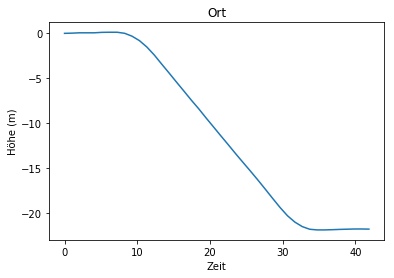

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title('Ort')
ax1.set_xlabel('Zeit')
ax1.set_ylabel('Höhe (m)')
ax1.plot(experiment.values[:,0], experiment.values[:,2])
plt.show()

Da die Werte selbst nicht stetig sind, lassen sich die Funktionen für sowohl den Ort, als auch für Geschwindigkeit und Beschleunigung des Aufzugs nicht durch stetige Funktionen darstellen. 

Durch Ausprobieren sind wir auf die folgende Fallunterscheidung gekommen um die Position des Aufzugs während des Experiments zu beschreiben: 


\begin{equation}
   f(x) =
   \begin{cases}
     0 & \text{für } x < 8 \\
     \frac{(-x^2)}{35}+2 & \text{für } 8 \ge x < 11.8 \\
     10-x & \text{für } 11.8 \ge x < 30\\
     \frac{(-x^2)}{130}-13.3 & \text{für } 30 \ge x < 34\\
     -22 & \text{für } \ge 34
   \end{cases}
\end{equation}

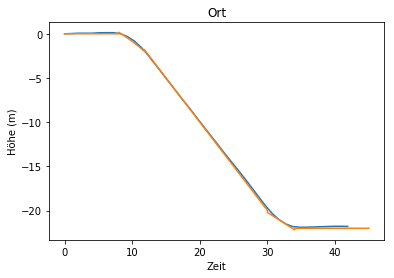

In [239]:
def height(x):
    if x < 8:
        return 0.0
    elif x < 11.8:
        return (-x**2)/35+2
    elif x < 30:
        return 10-x
    elif x < 34:
        return (-x**2)/130-13.3
    else:
        return -22
    
    
x = np.arange(0,45, 0.01)
y_height = [height(xs) for xs in x]
plt.plot(experiment.values[:,0], experiment.values[:,2])
plt.title('Ort')
plt.xlabel('Zeit')
plt.ylabel('Höhe (m)')
plt.plot(x,y_height)
plt.show()

Der zweite Plot stellt die Geschwindigkeit des Aufzugs während der Fahrt nach unten dar. Der Aufzug bewegt sich anfangs nur sehr langsam, bevor das Tempo nach etwa Sekunden rapide steigt. Nach insgesammt  12 Sekunden hat er seine maximale Geschwindigkeit von ~1m/s erreicht. Diese hält der Aufzug relativ gleichmäßig für 16 Sekunden, bevor er bei Sekunde 28 beginnt abzubremsen. Nach etwa 34 Sekunden steht der Aufzug fast still, das Ende der Fahrt ist erreicht.

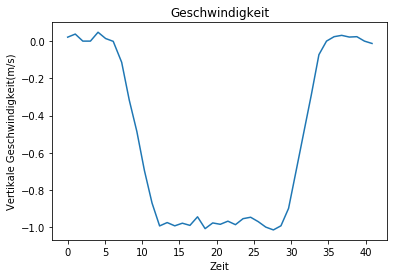

In [232]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.set_title('Geschwindigkeit')
ax2.set_xlabel('Zeit')
ax2.set_ylabel('Vertikale Geschwindigkeit(m/s)')
ax2.plot(experiment.values[:,0], experiment.values[:,4])

Die Geschwindigkeitsfunktion des Aufzugs lässt sich annähernd mithilfe der folgende Fallunterscheidung beschreiben:

\begin{equation}
   f(x) =
   \begin{cases}
     0 & \text{für } x < 7 \\
     1.3-\frac{x}{5.2} & \text{für } 7 < x < 12 \\
     -1 & \text{für } 12.0 < x < 29 \\
     \frac{x}{5.5}-6.3 & \text{für } 29 < x < 34\\
     0 & \text{für } x \ge 34
   \end{cases}
\end{equation}

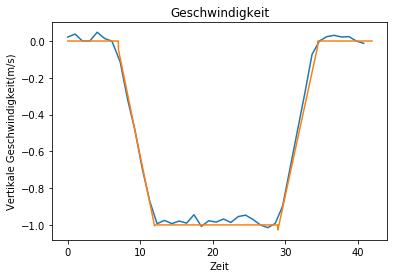

In [233]:
def speed(x):
    if x < 7:
        return 0
    elif x < 12:
        return 1.3-x/5.2
    elif x < 29:
        return -1
    elif x < 34.5:
        return x/5.5-6.3
    elif x < 42:
        return 0
    
        
        
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.set_title('Geschwindigkeit')
ax2.set_xlabel('Zeit')
ax2.set_ylabel('Vertikale Geschwindigkeit(m/s)')
ax2.plot(experiment.values[:,0], experiment.values[:,4])

x = np.arange(0,45, 0.01)
y = [speed(xs) for xs in x]
ax2.plot(x,y)

Zuletzt soll noch die Beschleunigung beschrieben werden. Hierzu werden im gegensatz zu den Graphen von Position und Geschwindigkeit nicht nur 42, sondern 901 Messwerte miteinbezogen.
Am Anfang des Experiments steht der Aufzug fast still. Nach etwa 7.5 Sekunden beschleunigt er rapide in negative Richtung bis zu einem Wert von $-0.75m/s^2$. Dieser Vorgang dauert etwa 1.3 Sekunden, danach entschleunigt die Maschine genauso stark gegen 0. Sie hält ihre Geschwindigkeit für etwa 16 Sekunden konstant, bevor sie bei Sekunde 28 innerhalb von 1.3 Sekunden auf $0.75m/s^2$ in positive Richtung beschleunigt, also abbremst.

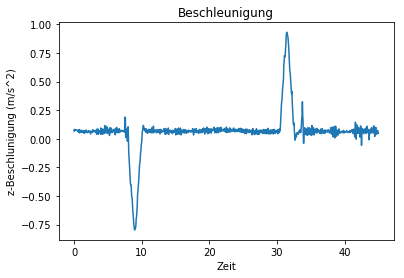

In [234]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.set_title('Beschleunigung')
ax3.set_xlabel('Zeit')
ax3.set_ylabel('z-Beschlunigung (m/s^2)')
ax3.plot(experiment_beschleunigung.values[:,0], experiment_beschleunigung.values[:,1])
plt.show()

Annähernd beschreiben lässt sich die Kurve mithilfe der folgenden Fallunterscheidung:

\begin{equation}
   f(x) =
   \begin{cases}
     0.07 & \text{für } x < 7.5 \\
     -0.669*x+5.089 & \text{für } 7.5 < x < 8.8 \\
     0.512*x-5.373 & \text{für } 8.8 < x < 10.4 \\
     0.07 & \text{für } 10.4 < x < 30.5 \\
     \frac{x}{1.5}-20.2 & \text{für } 30.5 < x < 31.8\\
     \frac{-x}{1.5}+22 & \text{für } 31.8 < x < 33\\
     0.07 & \text{für } x \ge 33
   \end{cases}
\end{equation}

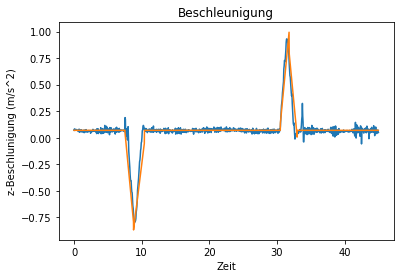

In [238]:
def accel(x):
    if x < 7.5:
        return 0.07
    elif x < 8.8:
        return -0.669*x+5.089
    elif x < 10.4:
        return 0.512*x-5.373
    elif x < 30.5:
        return 0.07
    elif x < 31.8:
        return x/1.5-20.2
    elif x < 33:
        return -x/1.5+22
    else:
        return 0.07
x = np.arange(0,45, 0.01)
y = [accel(xs) for xs in x]
plt.plot(experiment_beschleunigung.values[:,0], experiment_beschleunigung.values[:,1])
plt.plot(x,y)
plt.title('Beschleunigung')
plt.xlabel('Zeit')
plt.ylabel('z-Beschlunigung (m/s^2)')
plt.show()

Für die Animation des Aufzugs wurde vpython importiert. Innerhalb einer for-Schleife ruft der Code die zuvor berechnete Höhe zum jeweiligen Zeitpunkt X ab und ändert die Position des roten Aufzugs entsprechend. Zur Verdeutlichung der Höhenänderung wurde ein unbeweglicher grauer Aufzug neben die Startposition gesetzt. Zudem wurde mithilfe des Befehls rate() die Rechenleistung auf 100 Berechnungen pro Sekunde zu limitieren. Um die Animation problemlos Abzuspielen sollte hier der Kernel auf Vplay geändert werden.

In [ ]:
reference = box(pos = vec(-3,0,0), ratio = 0.1)
elevatorH = box(pos = vec(0,0,0), ratio = 0.1, color = color.red)

for newPos in y_height:
    rate(100)
    elevatorH.pos.y = newPos


## (b)

Welches Polynom beschreibt am bested die Daten Unbekannt.txt. Verwenden Sie pylab.polyfit


In [243]:
poly = np.loadtxt("UnbekannteDaten.txt", skiprows=1)

Die Datei Unbekannt.txt enhält 21 Messwerte denen X und Y Koordinaten zugeordnet werden können.

In [244]:
print(poly)

[[301.82671959 -10.        ]
 [206.4806859   -9.        ]
 [141.35069058  -8.        ]
 [181.45188429  -7.        ]
 [ 41.78127528  -6.        ]
 [ 36.74157683  -5.        ]
 [ 49.77129276  -4.        ]
 [-21.54843159  -3.        ]
 [ 75.43615714  -2.        ]
 [ -3.88826741  -1.        ]
 [ -9.46856287   0.        ]
 [-71.31945845   1.        ]
 [ 42.12156331   2.        ]
 [ 49.08801234   3.        ]
 [ 86.97664316   4.        ]
 [ 66.69982327   5.        ]
 [122.96273379   6.        ]
 [105.46219674   7.        ]
 [139.43161573   8.        ]
 [281.79008138   9.        ]
 [229.67424006  10.        ]]


In einer ersten Darstellung soll der erste Wert als X-Koordinate, der Zweite Wert als Y-Koordinate betrachtet werden.

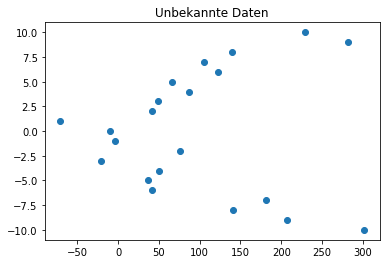

In [242]:
plt.plot(poly[:,0], poly[:,1], 'o')
plt.title('Unbekannte Daten')
plt.show()

Auf der X-Achse liegen die Punkte zwischen den Werten -71.4 und 302 und decken dabei alle ganzzahligen Y-Werte zwischen -10 und 10 ab, scheinen dabei aber keinerlei festem Muster zu folgen. Die Steigung einer Funktion die alle Punkte durchläuft würde 14 mal das Vorzeichen wechseln.
Der beste Fit mithilfe der numpy Funktion Polyfit würde demnach wohl eine einfache Gerade durch alle Punkte sein. Der unten abgebildete Graph enthält Plots entsprechender Polynome von Grad 1, 3 und 5. Polynome höherer Ordnung kommen den Punkten innerhalb des Intervalls $-71.4 \le x \le 302$ zwar näher, allerdings gehen diese Funktionen außerhalb sehr stark gegen 0 (siehe unterer Plot)

In [248]:
p = np.polyfit(poly[:,0], poly[:,1], deg=1)
p3 = np.polyfit(poly[:,0], poly[:,1], deg=3)
p5 = np.polyfit(poly[:,0], poly[:,1], deg=5)

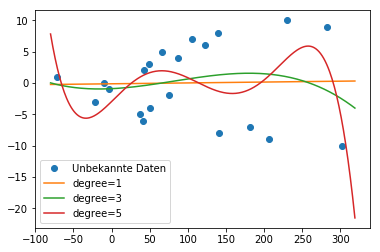

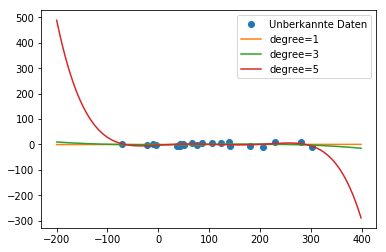

In [250]:
x = range(-80,320)
y = np.polyval(p,x)
y3 = np.polyval(p3,x)
y5 = np.polyval(p5,x)
plt.plot(poly[:,0], poly[:,1], 'o', label='Unbekannte Daten')
plt.plot(x,y, label='degree=1')
plt.plot(x,y3, label='degree=3')
plt.plot(x,y5, label='degree=5')
plt.legend()
plt.show()

x = x = range(-200,400)
y = np.polyval(p,x)
y3 = np.polyval(p3,x)
y5 = np.polyval(p5,x)
plt.plot(poly[:,0], poly[:,1], 'o', label='Unberkannte Daten')
plt.plot(x,y, label='degree=1')
plt.plot(x,y3, label='degree=3')
plt.plot(x,y5, label='degree=5')
plt.legend()
plt.show()

In einer zweiten Betrachtung werden die Werte umgekehrt betrachtet, die erste Spalte stellt nun die Y-Messwerte zu den entsprechenden X-Punkten dar.

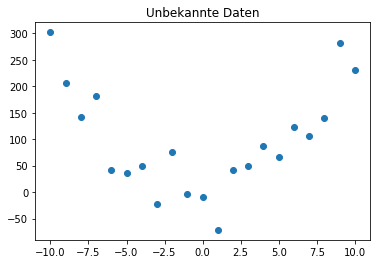

In [251]:
plt.plot(poly[:,1], poly[:,0], 'o')
plt.title('Unbekannte Daten')
plt.show()

Auf diese Weise angeordnet ergibt sich schon ein klareres Muster. Jedem ganzzahligen X-Wert zwischen $-10 \le x \le 10$ ist ein Y Wert zwischen $-71.4 und 302$ zugeordnet. Mit dem bloßen Auge ist eine Anordnung ähnlich einer nach oben geöffneten Parabel erkennbar. Der unten abgebildete Plot zeigt mit polyfit generierte Funktionen der Grade 2,3 und 4. 

In [252]:
p2 = np.polyfit(poly[:,1], poly[:,0], deg=2)
p3 = np.polyfit(poly[:,1], poly[:,0], deg=3)
p4 = np.polyfit(poly[:,1], poly[:,0], deg=4)

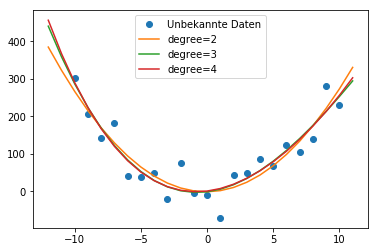

In [254]:
x = range(-12,12)
y2 = np.polyval(p2,x)
y3 = np.polyval(p3,x)
y4 = np.polyval(p4,x)
plt.plot(poly[:,1], poly[:,0], 'o', label='Unbekannte Daten')
plt.plot(x,y2, label='degree=2')
plt.plot(x,y3, label='degree=3')
plt.plot(x,y4, label='degree=4')
plt.legend()
plt.show()

Innerhalb des Intervalls $[10, 10]$ sind die Graphen kaum zu unterscheiden. Betrachtet man allerdings Werte außerhalb, ist auch hier leicht zu erkennen, dass die Polynome höherer Ordnung viel stärker gegen $\infty$ bzw $-\infty$ gehen. Demnach ist das Polynom zweiten Grades wohl der beste Fit, da es auch außerhalb des Intervalls gleichmäßig steigt, als auch die wenigste Rechnleistung benötigt um generiert zu werden.

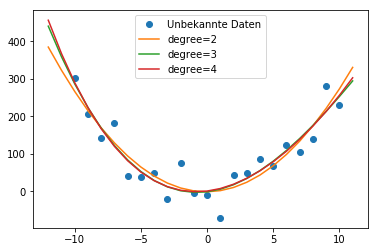

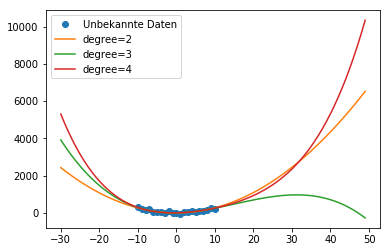

In [256]:
x = range(-12,12)
y2 = np.polyval(p2,x)
y3 = np.polyval(p3,x)
y4 = np.polyval(p4,x)
plt.plot(poly[:,1], poly[:,0], 'o', label='Unbekannte Daten')
plt.plot(x,y2, label='degree=2')
plt.plot(x,y3, label='degree=3')
plt.plot(x,y4, label='degree=4')
plt.legend()
plt.show()

x = range(-30,50)
y2 = np.polyval(p2,x)
y3 = np.polyval(p3,x)
y4 = np.polyval(p4,x)
plt.plot(poly[:,1], poly[:,0], 'o', label='Unbekannte Daten')
plt.plot(x,y2, label='degree=2')
plt.plot(x,y3, label='degree=3')
plt.plot(x,y4, label='degree=4')
plt.legend()
plt.show()

Fazit: Es scheint am sinnvollsten zu sein die Unbekannten Daten so auszulesen dass die erste Spalte Y-Messwerte und die zweite Spalte X-Werte anzeigt. Die Werte könnten vieles Darstellen, etwa die Höhenmeter eines Objekts oder die Beschleunigung während bzw. nach einem Bremsvorgang.
Ansonsten ergeben die Werte eine Datenwolke der ich weder ein passendes Polynom, noch ein reales Beispiel zuordnen könnte.


### (c)

Es werden verschiedene Massen an eine vertikale Feder gehängt und die Federlängen bestimmt die Daten befinden sich im File DatenFeder.txt. Führen Sie eine lineare Regession mit pylab.polyfit durch und bestimmen Sie die Federkonstanten für eine lineare ($F = Dx$) und eine kubische Funktion ($F = D_1x + D_2x^2 + D_3x^3$)

In [18]:
feder = np.loadtxt("DatenFeder.txt", skiprows=1)

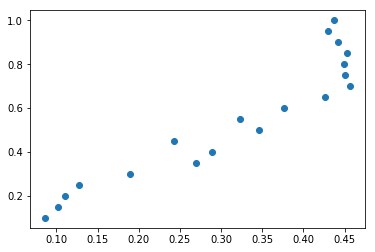

In [19]:
plt.plot(feder[:,0], feder[:,1], 'o')
plt.show()

In [20]:
linear = np.polyfit(feder[:,0], feder[:,1], deg=1)

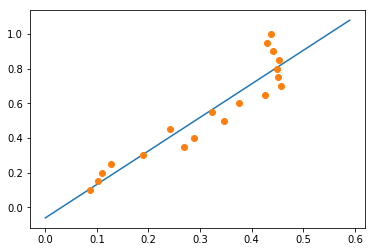

In [21]:
x = np.arange(0, 0.6, 0.01)
y = [linear[0]*xs + linear[1] for xs in x]
plt.plot(x,y)
plt.plot(feder[:,0], feder[:,1], 'o')
plt.show()

In [22]:
kubic = np.polyfit(feder[:,0], feder[:,1], deg=4)

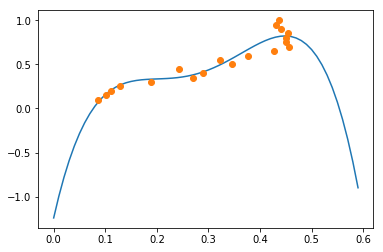

In [23]:
x = np.arange(0, 0.6, 0.01)
y = [kubic[0]*xs**4 + kubic[1]*xs**3 + kubic[2]*xs**2 + kubic[3]*xs + kubic[4] for xs in x]
plt.plot(x,y)
plt.plot(feder[:,0], feder[:,1], 'o')
plt.show()


### (d)

Ein kleiner Ball wird mit einer bestimmten Anfangsgeschwindigkeit unter einem bestimmten Abwurfwinkel geworfen und die $x$- und $y$-Position zu verschiedenen Zeitpunkten mit einer Videoanalyse gemessen (DatenSchWurf.txt). Führen Sie eine lineare Regression mit pylab polyfit durch. Schätzen sie die Flugzeit und Geschwindigkeit des Balles ab.


In [24]:
wurf = np.loadtxt("DatenSchWurf.txt", skiprows=1)

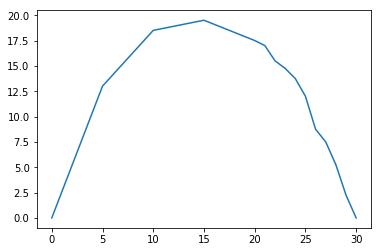

In [25]:
distance = wurf[:,0]
height = wurf [:,1]
plt.plot(distance, height)
plt.sh

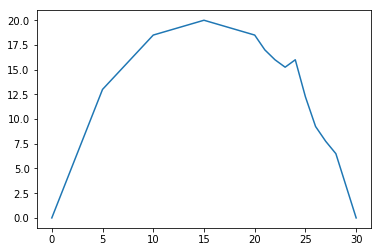

In [26]:
height2 = wurf[:,2]
plt.plot(distance, height2)

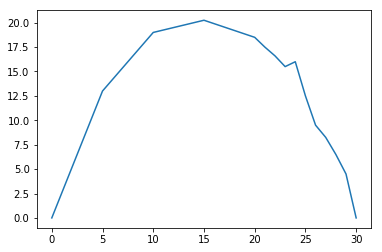

In [27]:
height3 = wurf[:,3]
plt.plot(distance, height3)

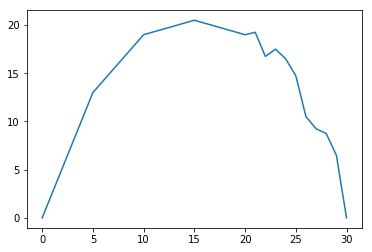

In [28]:
height4 = wurf[:,4]
plt.plot(distance, height4)

In [29]:
distance = wurf[:,0]
height = wurf[:,1:4]
c = np.polyfit(distance, height, deg=2)
c

array([[-0.08906891, -0.09014064, -0.09041047],
       [ 2.64889548,  2.71009403,  2.72935024],
       [ 0.71048819,  0.52352761,  0.55393343]])

-0.09041047350266546 2.7293502351834444 0.5539334274066994


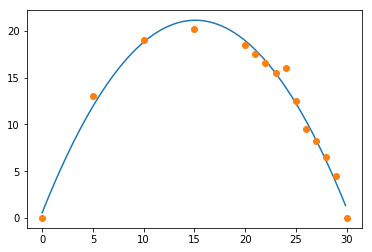

In [30]:
x = np.arange(0, 30, 0.1)
print(c[0,2],c[1,2],c[2,2])
y = [c[0,2]*xs**2 + c[1,2]*xs + c[2,2] for xs in x]
plt.plot(x,y)
plt.plot(wurf[:,0], wurf[:,3], 'o')
plt.show()

# 2. Wurfbewegung


## (a)

Ein Objekt wird von $x = x_0$ mit einer Anfangsgeschwindigkeit $v_0$ und einem Anfangswinkel $\theta_0$ abgeworfen. Die Reibung kann vernachlässtigt werden. Die einzige Kraft ist die Gravitationskraft in $y$-Richtung.



### i.

Lösen Sie die Differentialgleichungen: $\ddot{x} = 0, \ddot{y} = -g$ numerisch und vergleichen Sie das Ergebnis mit der analytischen Lösungen. Berechnen Sie die Wurfweite als Funktion des Abwurfwinkels.


In [31]:
# symbolische Variablen für die analytische Berechnung
g = sy.symbols('g') # Gravitationskraft
t, y0, v0, theta0 = sy.symbols('t, y0, v0, theta0') # t=Zeit, y0= y-Wert zum Zeitpunkt t=0, v0 = Anfangsgeschwindigkeit zum Zeitpunkt t=0, theta0 = Abwurfwinkel
y, dy = sy.symbols('y, \dot{y}', function=True) # y = y-Funktion ('Weg' des Wurfs in y-Richung), dy = dy Funktion (Geschwindigkeit des Wurfs in y Richtung)
x0 = sy.symbols('x0') # x0= x-Wert zum Zeitpunkt t=0
x, dx = sy.symbols('x, \dot{x}', function=True) # x = x-Funktion ('Weg' des Wurfs in x-Richung), dx = dx Funktion (Geschwindigkeit des Wurfs in x Richtung)

Um die Funktionen $x(t)$ und $y(t)$ analytisch berechnen zu können muss die Anfangsgeschwindikeit in die Anfangsgeschwindikeit in $x$- und $y$-Richtung aufgeteilt werden.

Zunächst stelle ich die Anfangsgeschwindikeiten und den Abwurfswinkel graphisch da.

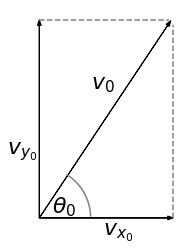

In [32]:
# Anfangsgeschwindikeit v0 dargestellt als Vektor
plt.arrow(0, 0, 1, 1.5, head_width=0.03, fc='#000000')
plt.text(0.4, 1, r'$v_{0}$', fontsize=22)

# Anfangsgeschwindikeit in y-Richtung (vy0) dargestellt als Vektor
plt.arrow(0, 0, 0, 1.5, head_width=0.03, fc='#000000')
plt.text(-0.25, 0.5, r'$v_{y_0}$', fontsize=22)
y_list = np.arange(0.0, 1.51, 0.01)
x_list = [1.04]*len(y_list)
plt.plot(x_list, y_list, '--', color='grey')

# Anfangsgeschwindigkeit in x-Richtung (vx0) dargestellt als Vektor
plt.arrow(0, 0, 1, 0, head_width=0.03, fc='#000000')
plt.text(0.5, -0.14, r'$v_{x_0}$', fontsize=22)
x_list = np.arange(0.0, 1.02, 0.01)
y_list = [1.54]*len(x_list)
plt.plot(x_list, y_list, '--', color='grey')

# Graphische Darstellung des Abwurfwinkels theta0
phis = np.arange(0.04, 1.01, 0.01)
x_list = [0.4*np.cos(phi_i) for phi_i in phis]
y_list = [0.4*np.sin(phi_i) for phi_i in phis]
plt.plot(x_list, y_list, 'grey')
plt.text(0.1, 0.04, r'$\theta_{0}$', fontsize=22)

# Einstellungen des Plots
plt.axis('scaled')
plt.axis('off')
plt.show()

Daraus folgt:
1. $$ \mathrm{sin}(\theta_{0}) = \frac{\mathrm{Gegenkathete}}{\mathrm{Hypotenuse}} = \frac{v_{y_0}}{v_0}$$

sowie:
2. $$ \mathrm{cos}(\theta_{0}) = \frac{\mathrm{Ankathete}}{\mathrm{Hypotenus}} = \frac{v_{x_0}}{v_0}$$


Durch Umformung wird 1. zu:
$$ v_{y_0} = v_0*\mathrm{sin}(\theta_0) $$
und 2. zu:
$$ v_{x_0} = v_0*\mathrm{cos}(\theta_0) $$

In [33]:
vx0 = v0*sy.cos(theta0)
vy0 = v0*sy.sin(theta0)

In [34]:
print('Anfangsgeschwindigkeit(v_x0 bzw. x\') in x-Richtung an Stelle t=0 in Abhängigkeit \nder Anfangsgeschwindigkeit und des Abwurfwinkels')
display(vx0)
print("Anfangsgeschwindigkeit(v_y0 bzw. y') in y-Richtung an Stelle t=0 in Abhängigkeit \nder Anfangsgeschwindigkeit und des Abwurfwinkels")
display(vy0)

Anfangsgeschwindigkeit(v_x0 bzw. x') in x-Richtung an Stelle t=0 in Abhängigkeit 
der Anfangsgeschwindigkeit und des Abwurfwinkels


Anfangsgeschwindigkeit(v_y0 bzw. y') in y-Richtung an Stelle t=0 in Abhängigkeit 
der Anfangsgeschwindigkeit und des Abwurfwinkels


##### Analytische Lösung der Differentialgleichungen
Zunächst müssen die Gleichungen $\dot{x}(t)$ und $\dot{y}(t)$ herausgefunden werden, welche die Geschwindikeiten in $x$ und $y$ Richtung beschreiben und deshalb gleichbedeuten mit $v_x(t)$ und $v_y(t)$ sind.

$\dot{x}$ und $\dot{y}$ sind gegeben durch:
$$ \dot{x}(t) = \int \ddot{x}(t) \ \mathrm{d}t = \int 0 \ \mathrm{d}t $$ 
$$ \dot{y}(t) = \int \ddot{y}(t) \ \mathrm{d}t = \int -g \ \mathrm{d}t$$

Um diese Integrale mit sympy zu berechnen wird des zusammenhang dieser Funktionen jedoch als Ableitung von $\dot{x}$ und $\dot{y}$ dargestellt:

$$ \frac{d}{dt}\dot{x}(t) = \ddot{x}(t) = 0 $$
$$ \frac{d}{dt}\dot{y}(t) = \ddot{y}(t) = -g $$

x'' Gleichung


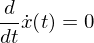

Allgemeine Lösung für x' aus dsolve


Anfangsbedingung für x' (= Anfangsbedingung für v_x(0) = vx0)


Anfangsbedingung Eingesetzt in die Allgemeine Lösung


Daraus Lösung der Konstante


Konstante in Allgemeine Lösung eingesetzt.
Daraus ergibt sich die Lösung für diese Anfangsbedingung:


In [35]:
eq_dx = sy.Eq(sy.Derivative(dx(t), t, 1), 0)
print('x\'\' Gleichung')
display(eq_dx)
sol_dx = sy.dsolve(eq_dx)
print("Allgemeine Lösung für x\' aus dsolve")
display(sol_dx)
ics = {dx(0): vx0}
print('Anfangsbedingung für x\' (= Anfangsbedingung für v_x(0) = vx0)')
display(ics)
C_dx_eq = sy.Eq(sol_dx.lhs.subs(t,0).subs(ics), sol_dx.rhs.subs(t,0))
print('Anfangsbedingung Eingesetzt in die Allgemeine Lösung')
display(C_dx_eq)
C_dx_sol = sy.solve(C_dx_eq)
print('Daraus Lösung der Konstante')
display(C_dx_sol)
dx_m = sol_dx.subs(C_dx_sol[0])
print('Konstante in Allgemeine Lösung eingesetzt.')
print('Daraus ergibt sich die Lösung für diese Anfangsbedingung:')
display(dx_m)

y'' Ausgedrückt durch d/dt y'


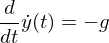

Allgemeine Lösung für y'


Anfangsbedingung für y' (= Anfangsbedingung für v_y(0) = vy0)


Anfangsbedingung Eingesetzt in die Allgemeine Lösung


Daraus Lösung der Konstante


Konstante in Allgemeine Lösung eingesetzt.
Daraus ergibt sich die Lösung für diese Anfangsbedingung:


In [36]:
eq_dy = sy.Eq(sy.Derivative(dy(t), t, 1), -g)
print("y'' Ausgedrückt durch d/dt y'")
display(eq_dy)
sol_dy = sy.dsolve(eq_dy)
print('Allgemeine Lösung für y\'')
display(sol_dy)
ics = {dy(0): vy0}
print('Anfangsbedingung für y\' (= Anfangsbedingung für v_y(0) = vy0)')
display(ics)
C_dy_eq = sy.Eq(sol_dy.lhs.subs(t,0).subs(ics), sol_dy.rhs.subs(t,0))
print('Anfangsbedingung Eingesetzt in die Allgemeine Lösung')
display(C_dy_eq)
print('Daraus Lösung der Konstante')
C_dy_sol = sy.solve(C_dy_eq)
display(C_dy_sol)
dy_m = sol_dy.subs(C_dy_sol[0])
print('Konstante in Allgemeine Lösung eingesetzt.')
print('Daraus ergibt sich die Lösung für diese Anfangsbedingung:')
display(dy_m)

Um nun auf die Lösung von $x(t)$ und $y(t)$ zu kommen, werden die eben berechneten Gleichungen für $\dot{x}(t)$ und $\dot{y}(t)$ integriert.
$$x(t) = \int \dot{x} \ dt $$
$$y(t) = \int \dot{y} \ dt $$
Somit ergibt sich das die Ableitungen von $x$ und $y$, $\ \dot{x}$ und $\dot{y}$ sind:

$$ \frac{d}{dt} y(t) = \dot{y}(t)$$
$$ \frac{d}{dt} x(t) = \dot{x}(t)$$

Hierzu wurde ebenfalls sympy verwendet und vorgegangen wie bei den Integrationen von $\ddot{x}$ und $\ddot{y}$.

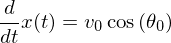

Anfangsbedingung für x(0) = x0


Lösung von x für diese Anfangsbedingung


In [37]:
eq_x = sy.Eq(sy.Derivative(x(t),t , 1), dx_m.rhs)
display(eq_x)
sol_x = sy.dsolve(eq_x)
display(sol_x)
ics = {x(0): x0}
print('Anfangsbedingung für x(0) = x0')
display(ics)
C_x_eq = sy.Eq(sol_x.lhs.subs(t, 0).subs(ics), sol_x.rhs.subs(t,0))
display(C_x_eq)
C_x_sol = sy.solve(C_x_eq)
display(C_x_sol)
x_m = sy.Eq(x, sol_x.subs(C_x_sol[0]).rhs)
print('Lösung von x für diese Anfangsbedingung')
display(x_m)

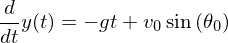

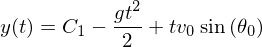

Anfangsbedingung von y(0) = y0


Lösung von y für diese Anfangsbedingung


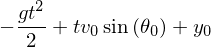

In [38]:
eq_y = sy.Eq(sy.Derivative(y(t),t , 1), dy_m.rhs)
display(eq_y)
sol_y = sy.dsolve(eq_y)
display(sol_y)
ics = {y(0): y0}
print('Anfangsbedingung von y(0) = y0')
display(ics)
C_y_eq = sy.Eq(sol_y.lhs.subs(t, 0).subs(ics), sol_y.rhs.subs(t,0))
display(C_y_eq)
C_y_sol = sy.solve(C_y_eq)
display(C_y_sol)
if isinstance(C_y_sol[0], dict):
    y_m = sol_y.subs(C_y_sol[0]).rhs
else:
    y_m = sol_y.subs({C_y_eq.rhs : C_y_eq.lhs}).rhs
print('Lösung von y für diese Anfangsbedingung')
display(y_m)

Nun soll $y$ nicht mehr in Abhängigkeit von $t$ sondern in Abhängigkeit von $x$-Werten dargestellt werden ($y(t) \Rightarrow y(x)$) um die Werte besser berechnen zu können.
Dabei wird die Gleichung $x(t)$ nach $t$ aufgelöst und das Ergenis in $y$ eingesetzt.

t aus der Gleichung von x =


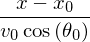

altes y: y(t)


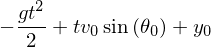

berechnetes t eingesetzt in y --> y(x)


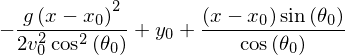

y(x) vereinfacht


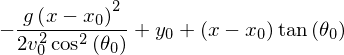

In [39]:
t_x = sy.solve(x_m, t)[0]
print('t aus der Gleichung von x =')
display(t_x)
print("altes y: y(t)")
display(y_m)
y_v = y_m.subs({t: t_x})
print("berechnetes t eingesetzt in y --> y(x)")
display(y_v)
#y_v = sy.simplify(y_v)
y_v = sy.trigsimp(y_v)
print('y(x) vereinfacht')
display(y_v)

##### Herleitung der Funktion der Wurfweite in Abhängigkeit des Abwurfwinkels
Der Wurf ist eine symmetrische Funktion $ \Rightarrow y(t)$ erreicht seinen Hochpunkt nach der hälfte der Zeit.

Um die Wurfweite zu berechnen benutzen wir diese Eigenschaft:

1) Hochpunkt von $y(t)$ berechnen ($\dot{y}(t)=0$) und nach $t$ (der Zeit auflösen) daraus ergibt sich $t_H$, die Zeit bis zum Höhepunkt

2) Wurfzeit is dann $2*t_H$ ($t_H$: Lösung aus 1) für $t$ in $x(t)$ einsetzen

Diese Gleichung = 0 setzen:


nach t aufgelöst: t_H =


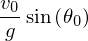

Gleichung x(t)


t_H für t eingesetzt


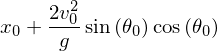

Lösung für Wurfweite(Vereinfacht)


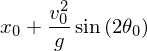

In [40]:
t = sy.symbols('t')
display(dy_m)
print('Diese Gleichung = 0 setzen:')
höhepunkt = sy.Eq(0, dy_m.rhs)
display(höhepunkt)
t_H = sy.solve(höhepunkt, t)[0]
print('nach t aufgelöst: t_H =')
display(t_H)
print('Gleichung x(t)')
display(x_m)
max_x = x_m.rhs.subs(t, 2*t_H)
print('t_H für t eingesetzt')
display(max_x)
print('Lösung für Wurfweite(Vereinfacht)')
max_x = sy.simplify(max_x)
display(max_x)

In [41]:
# Wurfweite mit substituierten Werten
# WICHTIG die Variablennamen für die Werte müssen konstant gehalten werden und können nicht andes bezeichnet werden!
def x_max(theta0_val):
    """
    Funktion zur Berechnung der Wurfweite
    :param theta0_val: Abwurfwinkel
    :return: Wurfweite in Abhängigkeit des Abwurfwinkels
    """
    return max_x.subs(x0, x0_val).subs(g, g_val).subs(v0, v0_val).subs(theta0, theta0_val)

Nun wird die Gravitationskraft definiert um die Funktionen Testen zu können

In [42]:
# Gravitationskraft
g_val = 9.81

Um die Funktion der Wurfweite in Abhängikeit des Abwurfwinkels zu Testen werden Werte für den Abwurfpunkt und der Anfangsgeschwindigkeit ausgewählt und konstant gehalten, während die Werte für den Abwurfwinkel verändert werden.

Es wird erwartet das sich die Wurfweite sich bei Werten unter $45°$ erhöht wenn sich der Winkel sich erhöht, da der $x$-Wert sein Potential durch seine hohe Anfangsgeschwindikeit nicht "ausschöpfen" kann, da eine kleinere Anfangsgeschwindikeit in $y$-Richtung dazu führt das der Höhepunkt schneller erreicht und die Kurve des Wurfs deshalb schneller abfällt.

Ab $45°$ jedoch veringert sich die Wurfweite wenn sich der Abwurfwinkel erhöht, da die Anfangsgeschwindikeit bei höherem Winkel in $y$-Richtung höher ist als in $x$-Richtung und das Objekt und deshalb mehr in die Höhe fliegt als in die Weite.
Dies zeige ich zunächst durch Berechnung der Angangsgeschwindigkeiten (Trigonometrisch) bei gleicher Anfangsgeschwindikeit mit unteschiedelichen Winkeln.

Bei $45°$ soll die Wurfweite am größten sein da sich hier die Anfangsgeschwindikeit gleichmäßig in $x$ und $y$ Richtung verteilt.

In [43]:
v0_val = 50
print('v0 = ', v0_val)
theta0_grad = 45
theta0_val = math.radians(theta0_grad)
print('Für theta0: ', theta0_grad)
print('vx0 = ', v0_val*sy.cos(theta0_val))
print('vy0 = ', v0_val*sy.sin(theta0_val))
theta0_grad = 60
theta0_val = math.radians(theta0_grad)
print('Für theta0: ', theta0_grad)
print('vx0 = ', v0_val*sy.cos(theta0_val))
print('vy0 = ', v0_val*sy.sin(theta0_val))
theta0_grad = 80
theta0_val = math.radians(theta0_grad)
print('Für theta0: ', theta0_grad)
print('vx0 = ', v0_val*sy.cos(theta0_val))
print('vy0 = ', v0_val*sy.sin(theta0_val))

v0 =  50
Für theta0:  45
vx0 =  35.3553390593274
vy0 =  35.3553390593274
Für theta0:  60
vx0 =  25.0000000000000
vy0 =  43.3012701892219
Für theta0:  80
vx0 =  8.68240888334652
vy0 =  49.2403876506104


Nun der Test für die Berechnung der Wurfweite.

In [44]:
y0_val = 0
x0_val = 0
v0_val = 50
print('Für y0 = ', y0_val, ', x0 = ', x0_val, ', v0 = ', v0_val)
theta0_grad = 20
theta0_val = math.radians(theta0_grad)
print('Für theta0: ', theta0_grad)
print('Wurfweite: ', x_max(theta0_val))
theta0_grad = 30
theta0_val = math.radians(theta0_grad)
print('Für theta0: ', theta0_grad)
print('Wurfweite: ', x_max(theta0_val))
theta0_grad = 45
theta0_val = math.radians(theta0_grad)
print('Für theta0: ', theta0_grad)
print('Wurfweite: ', x_max(theta0_val))
theta0_grad = 60
theta0_val = math.radians(theta0_grad)
print('Für theta0: ', theta0_grad)
print('Wurfweite: ', x_max(theta0_val))
theta0_grad = 80
theta0_val = math.radians(theta0_grad)
print('Für theta0: ', theta0_grad)
print('Wurfweite: ', x_max(theta0_val))

Für y0 =  0 , x0 =  0 , v0 =  50
Für theta0:  20
Wurfweite:  163.809278717263
Für theta0:  30
Wurfweite:  220.699644185637
Für theta0:  45
Wurfweite:  254.841997961264
Für theta0:  60
Wurfweite:  220.699644185637
Für theta0:  80
Wurfweite:  87.1610966681113


Meine Funktion der Wurfweite reagiert wie angenommen, deshalb kann davon ausgegangen das meine Funktion den richtigen Wert zurückgibt. Diese Annahme soll jedoch gleich nochmal durch die analytische Lösung des Wurfs bestätig werden, da dort die Funktion `x_max`(Funktion der Wurfweite) aufgerufen wird um die $x$-Werte zu  berechnen (mit `np.arange` von 0 bis zur Wurfweite). Wenn nun die zugehörigen $y$-Werte, durch $y(x)$ berechnet werden, kann manüberprüfen ob der letzte $y$-Wert wieder mit dem ersten $y$-Wert übereinstimmt(Der Wurf beendet ist).

In [45]:
def anLsg(x0_val, y0_val, v0_val, theta0_val):
    """
    Funktion zu Berechnung der x und y Werte für die analytische Lösung
    :param x0_val: x-Koordinate des Abwurfortes
    :param y0_val: y-Koordinate des Abwurfortes
    :param v0_val: Anfangsgeschwindigkeit
    :param theta0_val: Abwurfwinkel
    :return: x-Wert, y-Werte
    """
    y_val = y_v.subs({x0: x0_val, y0: y0_val, v0: v0_val, theta0: theta0_val, g: g_val})
    x_list = np.linspace(x0_val, float(x_max(theta0_val)), 100)
    y_list = []
    for x_i in x_list:
        y_i = y_val.subs({x: x_i})
        y_list.append(y_i)
    return x_list, y_list

Um nun die Analytische Lösung zu Testen wird immer einer der Parameter verändert während die anderen konstant gehalten werden und überprüft ob die berechneten Ergebnisse mit den Erwartungen übereinstimmen.

Zunächst wird die Funktion für verschiedene $\theta_0$ Werte getestet.
Es wird erwartet das die Kurve flacher wird, je kleiner der Abwurfwinkel ist, und somit steiler je höher der Abwurfwinkel.

letztes y:  0.0
letztes y:  -0.0
letztes y:  0.0
letztes y:  0.0
letztes y:  -0.0


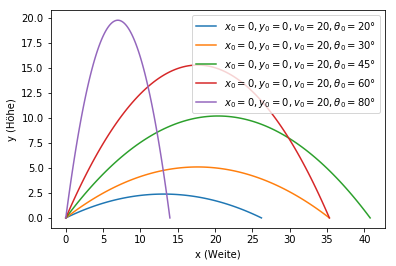

In [46]:
y0_val = 0
x0_val = 0
v0_val = 20
theta0_grad = 20
theta0_val = math.radians(theta0_grad)
_label = r'$x_0 = '+str(x0_val)+r', y_0 ='+str(y0_val)+', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_a, y_a = anLsg(x0_val, y0_val, v0_val, theta0_val)
print('letztes y: ', round(y_a[-1], 5))
plt.plot(x_a, y_a, label=_label)
theta0_grad = 30
theta0_val = math.radians(theta0_grad)
_label = r'$x_0 = '+str(x0_val)+r', y_0 ='+str(y0_val)+', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_a, y_a = anLsg(x0_val, y0_val, v0_val, theta0_val)
print('letztes y: ', round(y_a[-1], 5))
plt.plot(x_a, y_a, label=_label)
theta0_grad = 45
theta0_val = math.radians(theta0_grad)
_label = r'$x_0 = '+str(x0_val)+r', y_0 ='+str(y0_val)+', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_a, y_a = anLsg(x0_val, y0_val, v0_val, theta0_val)
print('letztes y: ', round(y_a[-1], 5))
plt.plot(x_a, y_a, label=_label)
theta0_grad = 60
theta0_val = math.radians(theta0_grad)
_label = r'$x_0 = '+str(x0_val)+r', y_0 ='+str(y0_val)+', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_a, y_a = anLsg(x0_val, y0_val, v0_val, theta0_val)
print('letztes y: ', round(y_a[-1], 5))
plt.plot(x_a, y_a, label=_label)
theta0_grad = 80
theta0_val = math.radians(theta0_grad)
_label = r'$x_0 = '+str(x0_val)+r', y_0 ='+str(y0_val)+', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_a, y_a = anLsg(x0_val, y0_val, v0_val, theta0_val)
print('letztes y: ', round(y_a[-1], 5))
plt.plot(x_a, y_a, label=_label)
plt.legend()
plt.xlabel('x (Weite)')
plt.ylabel('y (Höhe)')
plt.show()

Die Plots sehen aus wie angenommen, weshalb davon ausgegangen werden kann das die analytische Lösung richtig mit dem Abwurfwinkel umgeht. 

Zudem wird für jeden Winkel der letzte berechhnete $y$-Wert ausgegeben um noch einmal zu überprüfen das die Funktion der Wurfweite korrekt ist. Da in der Funktion `anLsg` nicht mit genau die Wurfeite sondern nur einem sehr nahen Wert gerechnet werden kann, kann auch der letzte $y$-Wert nicht wieder genau mit dem ersten übereinstimmen. Da diese jedoch sehr nahe am ersten Liegen kann davon ausgegangen werden das die `x_max` Funktion die richtige Wurfweite ausgibt.

Als nächstes folgt eine Test für den $x$-Wert des Abwurfortes.
Wird der $x$ Wert erhöht so verschiebt sich der Wurf um den Anfangswert nach rechts, wird er veringert verschiebt er sich um den Wert nach links.

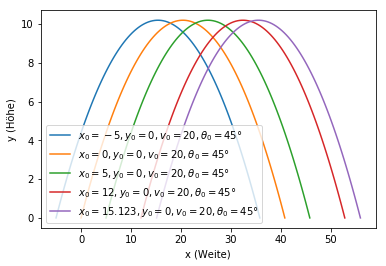

In [47]:
y0_val = 0
v0_val = 20
theta0_grad = 45
theta0_val = math.radians(theta0_grad)
x0_val = -5
_label = r'$x_0 = '+str(x0_val)+r', y_0 ='+str(y0_val)+', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_a, y_a = anLsg(x0_val, y0_val, v0_val, theta0_val)
plt.plot(x_a, y_a, label=_label)
x0_val = 0
_label = r'$x_0 = '+str(x0_val)+r', y_0 ='+str(y0_val)+', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_a, y_a = anLsg(x0_val, y0_val, v0_val, theta0_val)
plt.plot(x_a, y_a, label=_label)
x0_val = 5
_label = r'$x_0 = '+str(x0_val)+r', y_0 ='+str(y0_val)+', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_a, y_a = anLsg(x0_val, y0_val, v0_val, theta0_val)
plt.plot(x_a, y_a, label=_label)
x0_val = 12
_label = r'$x_0 = '+str(x0_val)+r', y_0 ='+str(y0_val)+', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_a, y_a = anLsg(x0_val, y0_val, v0_val, theta0_val)
plt.plot(x_a, y_a, label=_label)
x0_val = 15.123
_label = r'$x_0 = '+str(x0_val)+r', y_0 ='+str(y0_val)+', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_a, y_a = anLsg(x0_val, y0_val, v0_val, theta0_val)
plt.plot(x_a, y_a, label=_label)
plt.legend()
plt.xlabel('x (Weite)')
plt.ylabel('y (Höhe)')
plt.show()

Auch hier reagiert `anLsg` wie erwartet, es ist also davon auszugehen das auch der $x$ Wert richtig behandelt wird.

Nun wird der Test für den $y$ Wert des Abwurfortes durgeführt.
Hier soll sich der Graph des Wurfes nach oben verschieben wenn sich der $y$ Wert erhöht, und nach unter verschieben wenn sich dieser verringert.

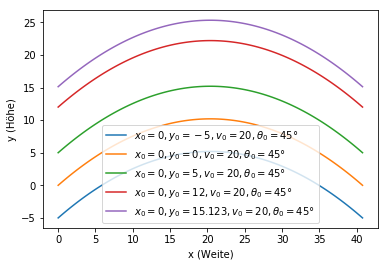

In [48]:
x0_val = 0
v0_val = 20
theta0_grad = 45
theta0_val = math.radians(theta0_grad)
y0_val = -5
_label = r'$x_0 = '+str(x0_val)+r', y_0 ='+str(y0_val)+', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_a, y_a = anLsg(x0_val, y0_val, v0_val, theta0_val)
plt.plot(x_a, y_a, label=_label)
y0_val = 0
_label = r'$x_0 = '+str(x0_val)+r', y_0 ='+str(y0_val)+', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_a, y_a = anLsg(x0_val, y0_val, v0_val, theta0_val)
plt.plot(x_a, y_a, label=_label)
y0_val = 5
_label = r'$x_0 = '+str(x0_val)+r', y_0 ='+str(y0_val)+', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_a, y_a = anLsg(x0_val, y0_val, v0_val, theta0_val)
plt.plot(x_a, y_a, label=_label)
y0_val = 12
_label = r'$x_0 = '+str(x0_val)+r', y_0 ='+str(y0_val)+', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_a, y_a = anLsg(x0_val, y0_val, v0_val, theta0_val)
plt.plot(x_a, y_a, label=_label)
y0_val = 15.123
_label = r'$x_0 = '+str(x0_val)+r', y_0 ='+str(y0_val)+', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_a, y_a = anLsg(x0_val, y0_val, v0_val, theta0_val)
plt.plot(x_a, y_a, label=_label)
plt.legend()
plt.xlabel('x (Weite)')
plt.ylabel('y (Höhe)')
plt.show()

Auch hier werden die Erwartungen bestätigt, wodurch auch davon ausgegangen werden kann das die $y$ Werte von der Funktion richtig behandelt werden.

Nun muss die Funktion nurnoch für verschieden Anfangesgeschwindigkeiten ($v_0$) getestet werden.
Hier wird davon ausgegangen da der Wurf sich bei erhöhen der Anfangsgeschwindikeit vergrößert (in $x$ und $y$ Richtung), während die Kurve gleich flach/steil bleibt.

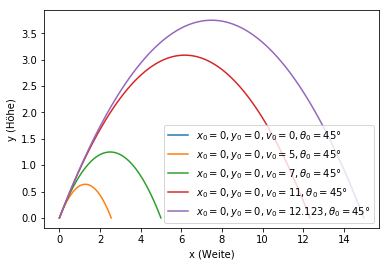

In [49]:
x0_val = 0
y0_val = 0
theta0_grad = 45
theta0_val = math.radians(theta0_grad)
v0_val = 0
_label = r'$x_0 = '+str(x0_val)+r', y_0 ='+str(y0_val)+', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_a, y_a = anLsg(x0_val, y0_val, v0_val, theta0_val)
plt.plot(x_a, y_a, label=_label)
v0_val = 5
_label = r'$x_0 = '+str(x0_val)+r', y_0 ='+str(y0_val)+', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_a, y_a = anLsg(x0_val, y0_val, v0_val, theta0_val)
plt.plot(x_a, y_a, label=_label)
v0_val = 7
_label = r'$x_0 = '+str(x0_val)+r', y_0 ='+str(y0_val)+', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_a, y_a = anLsg(x0_val, y0_val, v0_val, theta0_val)
plt.plot(x_a, y_a, label=_label)
v0_val = 11
_label = r'$x_0 = '+str(x0_val)+r', y_0 ='+str(y0_val)+', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_a, y_a = anLsg(x0_val, y0_val, v0_val, theta0_val)
plt.plot(x_a, y_a, label=_label)
v0_val = 12.123
_label = r'$x_0 = '+str(x0_val)+r', y_0 ='+str(y0_val)+', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_a, y_a = anLsg(x0_val, y0_val, v0_val, theta0_val)
plt.plot(x_a, y_a, label=_label)
plt.legend()
plt.xlabel('x (Weite)')
plt.ylabel('y (Höhe)')
plt.show()

Auch diese Ergebnisese entschprechen den Vermutungen, damit ist auch der letzte Parameter geprüft und die Richtigkeit der Funktion in Bezug auf diesen Patameter bestätigt. Nun kann endgültig davon ausgegangen werden das die Funktion für die analytische Lösung richtige Ergebnisse zurückgibt.

#### Numerische Lösung mit Euler Verfahren

Für die numerische Lösung der Dgl werden die Werte mit dem Euler Verfahren berechnet. 

In [50]:
def euler(y_old, h, f):
    """
    Euler Verfahren zur Berechnung von Differentialgleichungen
    :param y_old: letzter Berechneter y vor dem nächsten Schritt
    :param h: Schrittweite
    :parameter f: letzter berechneter Wert aus dem zu lösenden Dgl (y_old')
    """
    return y_old + h*f

Die Funktion `t_max` berechnet die Zeit bis zum Maximum der $y$-Funktion. Hier wird die oben berechnete Funktion `t_H`, die zum berechnen der Wurfweite benutzt wurde, verwendet. In diese werden einfach die aktuellen Werte eingesetzt.
`t_max` wird dafür verwendet den höchsten $y$-Wert (in `y_max`) zu berechnen.

In [51]:
def t_max(v0_val, theta0_val):
    """
    :param v0_val: Abwurfgeschwindikeit
    :param theta0_val: Abwurfwinkel
    :return: Zeitpunkt an dem der Höhepunkt für y(t) erreicht wird
    """
    return t_H.subs(v0, v0_val).subs(theta0, theta0_val).subs(g, g_val)

Die Funktion `y_max` wird in diesem Teil der Aufgabenbearbeitung nur verwendet um eine ordentliche Darstellung des Plots zu gewährleisten (sonst gehen die $y$-Werte bei zu großen Schritten ins negative).
In der späteren Bearbeitung wird diese Funktion jedoch noch verwendet um das Randwertproblem zu lösen.
ob diese Funktion den richtigen Wert zurückgibt kann im Plot beobachtet werden. Stellt dieser Plot den gesamten Graphen des Wurfes da (ohne ihn abzuschneiden) ohne das die $y$-Achse weit über den höchsten Wert hinausgeht kann davon ausgegangen werden das der Wert aus der Funktion mit dem Höhepunkt der $y$-Funktion übereinstimmt.
Die Funktion `y_m` in der in dieser Funktion Werte substituiert werden ist die Funktion für $y(t)$

In [52]:
def y_max(v0_val, theta0_val, y0_val):
    """
    :param v0_val: Abwurfgeschwindikeit
    :param theta0_val: Abwurfwinkel
    :param y0_val: y Wert des Ortes zum Anfangszeitpunkt
    :return: Höhepunkt der y-Funktion
    """
    t_m = t_max(v0_val,theta0_val)
    y_v = y_m.subs({y0: y0_val, v0: v0_val, theta0: theta0_val, g: g_val})
    return y_v.subs(t, t_m)

Die Funktion `numLsg`, berechnet die $x$ und $y$ Werte der Wurffunktion numerisch mit dem Euler Verfahren.
Hierbei wird jedoch die analytische Lösung für die maximale Wurfzeit verwendet um einen Richtwert für die Berechnung zu haben.
In dieser Funktion wird vom Anfangszeitpunkt bis zum Endzeitpunkt immer wieder die Funktion des Euler Verfahrens aufgerufen um den nächsten Wert zum Zeitpunkt t+h zu berechnen. Es wird noch eine Abbruchbedingung eingefügt, wenn der neu berechnete $y$-Wert den ersten $y$ Wert unterschreitet da für eine große Schrittweite der Wurf sehr ungenau berechnet wird und vor Überschreitung des Endzeitpunktes beendet ist.

In [53]:
def numLsg(theta0_val, v0_val, y0_val, x0_val, h):
    """
    :param theta0_val: Abwurfwinkel
    :param v0_val: Abwurfgeschwindigkeit
    :param y0_val: y-Wert des Abwurfortes
    :param x0_val: x-Wert des Abwurfortes
    :param h: Schrittweite
    """
    # Berechnung der maximalen Zeit analytisch, wird jedoch nur verwendet um zu Wissen in welchem Bereich
    # numerisch berchnet werden soll.
    t_max = (v0_val*sy.sin(theta0_val))/g_val
    t_end = 2*t_max # symmetrisch
    vx0_eu = v0_val*sy.cos(theta0_val)
    vy0_eu = v0_val*sy.sin(theta0_val)
    # Variablen mit _n sind Varibalen zum jetzigen Zeitpunkt t
    # Variablen mit _e Listen
    # Variablen mit _np1 ist der berechnete Wert zum Zeitpunkt t+h
    vx_n = vx0_eu
    x_n = x0_val
    x_e = [x0_val]
    y_n = y0_val
    vy_n = vy0_eu
    y_e = [y0_val]
    for ts in np.arange(t_start, t_end, h):
        # Euler Schritt um den nächsten Wert für y'und x' zu berechnen
        vy_np1 = euler(vy_n, h, ddy_n)
        vx_np1 = euler(vx_n, h, ddx_n)
        # Euler Schritt um den nächsten Wert für  y und x zu berechen
        # hierbei werden die eben berechneten Werte verwendet
        y_np1 = euler(y_n, h, vy_np1)
        x_np1 = euler(x_n, h, vx_np1)
        vx_n = vx_np1
        x_n = x_np1
        vy_n = vy_np1
        y_n = y_np1
        # Abbruchbedingung
        if y_np1 >= y0_val:
            y_e.append(y_np1)
            x_e.append(x_np1)
        else:
            y_e.append(y_np1)
            x_e.append(x_np1)
            break
    return x_e, y_e

In [54]:
# ddx_n, und ddy_n bezeichnen die zu letzt berechneten Werte der Differentialgleichungen
# zu Begin werte aus der Angabe (zum Zeitpunkt t=0)
ddx_n = 0
ddy_n = -g_val

In [55]:
t_start = 0
h = 0.5

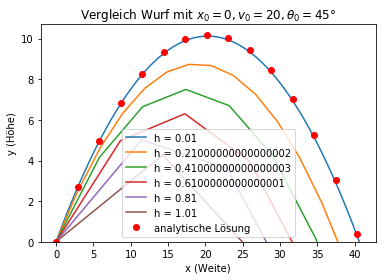

In [56]:
# Werte zum Testen des Euler Verfahren
x0_val = 0
y0_val = 0
theta0_grad = 45
theta0_val = math.radians(theta0_grad)
v0_val = 20

#Ploten mit verschieden Schrittweiten
for h_val in np.arange(0.01, 1.2, 0.2):
    label_this = 'h = '+ str(h_val)
    x_e, y_e = numLsg(theta0_val, v0_val, y0_val, x0_val, h=h_val)
    l = plt.plot(x_e, y_e, label=label_this)

# Zum Vergleichen
x_a, y_a = anLsg(x0_val, y0_val, v0_val, theta0_val)
x_a = [x_a[i] for i in range(0,len(x_a)) if i%7==0]
y_a = [y_a[i] for i in range(0,len(y_a)) if i%7==0]
# abspeichern für späteren Test
x_a_test, y_a_test = x_a, y_a
plt.plot(x_a, y_a, 'ro', label='analytische Lösung')
title_num = r'Vergleich Wurf mit $x_0='+str(x0_val)+r', v_0='+str(v0_val)+', \\theta_0='+str(theta0_grad)+r'°$'
plt.title(title_num)
plt.xlabel('x (Weite)')
plt.ylabel('y (Höhe)')
plt.legend()

# Für schönere Darstellung
x_ma = float(x_max(theta0_val))
y_ma = float(y_max(v0_val, theta0_val, y0_val))
plt.axis([x0_val-(x_ma/20), x_ma+(x_ma/20), y0_val, y_ma+(y_ma/20)])
plt.show()

Die numerische Lösung für den schrägen Wurf ist schon bei einer relativ höhen Schrittweite ($h=0.01$) sehr genau. Wählt man die Schrittweite jedoch noch größer, dann wird die Lösung sehr ungenau.


### ii.

Formulieren Sie die Aufgabe als Randwertproblem für einen senkrechten Wurf ($\theta_0 = \pi$). Bestimmen Sie die Anfangsgeschwindigkeit bei vorgegebener Wurfhöhe mit Hilfe einer binären Suche.


Bei einem Randwertproblem sind Werte für die Lösung an mehr als einen Punkt gegeben. In diesem Fall sind zwei Werte für die Lösungen am selben Punkt $x=0$ für $y(x)$ gegeben. 

Bei einem senkrechten Wurf bleibt die $x$ Koordinate konstant. Die Wurfhöhe sowie der Anfangswert von $y$ sind zur Berechnung gegeben. Somit ergeben sich zwei Lösungen $y(0) = y_0$ und $y(0) = \mathrm{Wurfhöhe} = y_h$ am selben Punkt.

Nun ist der Wert für die Anfangsgeschwindigkeit $\dot{y}(0) = v_{y_0}$ gesucht.

Das beschriebene Problem kann durch das Schießverfahren gelöst werden. Hierbei wird ein Wert für $v_{y_0}$ gewählt, das Anfangswertproblem mit diesen Wert gelöst und versucht $y(0) = y_h$ zu treffen.
Das Randwertproblem ist gelöst, wenn $y(0) = y_h$ für die Anfangswerte $y(0) = y_0$ und $\dot{y} = v_{y_0}$ erreicht wird.

Die Wurfhöhe ist gleichbedeutend mit dem Hochpunkt der $y$ Funktion weshalb in der Implementierung des Randwertproblemes die oben implimentierte Funktion `y_max` verwendet wird, die eben diesen Hochpunkt berechnet.

Das Schießverfahren soll mit der binären Suche gelöst werden, welche normalerweise auf einer Liste ausgeführt wird. Bei der Impliementierung wurde jedoch keine Liste verwendet um den richtigen Wert auf jeden Fall erreichen zu können (eine Liste ist auf gewisse Werte beschränkt ist). 

Die binäre Suche mit Zahlen funktioniert indem die Lösung, `y_maximum`, für den letzte Wert von $v_{y_0}$, mit dem gewünschten Wert, $y_h$, verglichen wird. Liegt der berechnete Wert `y_maximum` unter dem gewünschten Wert wird vom altem $v_{y_0}$ ein 'Schritt' abgezogen. Dieser Schritt ist zu Beginn des Verfahrens die Hälfte des ersten $v_{y_0}$ Wertes und halbiert sich bei jeder erneuten Berechnung. Ist `y_maximum` größer als $y_h$ wird der Schritt vom letzten $v_{y_0}$ abgezogen. So nähert man sich dem Wert von $y_h$ mit jedem Schritt an. Da es jedoch unrealistisch ist mit einem angemessenen Aufwand exakt den Wert von $y_h$ zu treffen (Schritte werden schnell sehr klein und Wert nähern sich deshalb immer langsamer), wird eine Toleranz `TOL` für den Fehler (unterschied zwischen `y_maximum` und $y_h$) eingeführt.

In [57]:
def BVP(y_h, intermediate=False):
    """
    :param y_h: Wurfhöhe die erreicht werden soll
    :param intermediate: True, wenn die berechneten Werte für y in jedem Schritt zurückgegeben werden sollen
    :return: 
    intermediate=False: erreichte Wurfhöhe, Anfangsgeschwindigkeit für die diese Wurfhöhe erreicht wurde
    intermediate=True: alle berechneten Wurfhöhen, Anfangsgeschwindigkeit für die diese Wurfhöhe erreicht wurde
    """
    v0_val = 50
    step = v0_val/2
    y_maximum = y_max(v0_val, theta0_val, y0_val)
    if intermediate:
        ys = [y_maximum]
    while abs(y_maximum-y_h) > TOL:
        #print('maximum y', y_maximum)
        #print('step', step)
        if y_maximum-y_h < 0:
            #print('Kleiner')
            v0_val = v0_val + step
            #print('v0', v0_val)
            y_maximum = y_max(v0_val, theta0_val, y0_val)
        elif y_maximum-y_h > 0:
            #print('größer')
            #print('v0', v0_val)
            v0_val = v0_val - step
            y_maximum = y_max(v0_val, theta0_val, y0_val)
        if intermediate:
            ys.append(y_maximum)
        step = step/2
    if intermediate:
        return ys, v0_val
    else:
        return y_maximum, v0_val

In [58]:
TOL = 1e-1
x0_val = 0
theta0_val = math.pi/2
y0_val = 0

Um in einem Plot betrachten zu können wie sich der y Wert an die gewünschte Lösung für die Wurfhöhe annähert wird die Funktion mit dem Paramerter `intermediate`=True berechnet um für jeden Schritt in der Funktion den y-Wert betrachten zu können

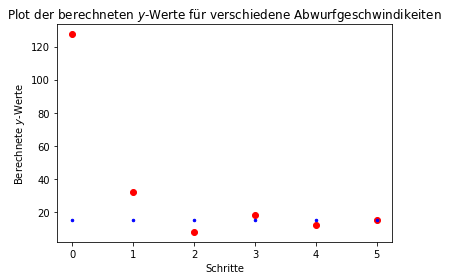

In [59]:
y_wh = 15
y_l, v0_val = BVP(y_wh, True)
#print(y_l[-1])
#print(v0_val)
for i in range(0, len(y_l)):
    plt.plot(i, y_l[i], 'ro')
    plt.plot(i, y_wh, 'bo', ms=2.5)
plt.title(r'Plot der berechneten $y$-Werte für verschiedene Abwurfgeschwindikeiten')
plt.ylabel(r'Berechnete $y$-Werte')
plt.xlabel(r'Schritte')
plt.show()

Für diesen Plot Wurde die Toleranz sehr hoch gewählt, da nur gezeigt werden sollte wie sich die y-Werte der Lösung (in Blau dargestellt) annähern, und für Werte die nah am Lösungswert liegen in der Grafik kein unterschied erkennbar ist.

Um die Richtigkeit der Funktion zu überprüfen wird nun wieder eine höhere Toleranz angestrebt. Für die Ergebnisse wird erwartet, das sich die Lösung für die Abwurfgeschwindikeit erhöht je größer die Wurfhöhe gewählt wird.

In [60]:
TOL = 1e-15
x0_val = 0
theta0_val = math.pi/2
y0_val = 0
y_wh = 1.1
print('Gewünschte Wurfhöhe: ', y_wh)
y_l, v0_val = BVP(y_wh)
print('Ereichte Wurfhöhe: ', y_l)
print('Benötigte Abwurfgeschwindikeit: ', v0_val)
y_wh = 5
print('Gewünschte Wurfhöhe: ', y_wh)
y_l, v0_val = BVP(y_wh)
print('Ereichte Wurfhöhe: ', y_l)
print('Benötigte Abwurfgeschwindikeit: ', v0_val)
y_wh = 20
print('Gewünschte Wurfhöhe: ', y_wh)
y_l, v0_val = BVP(y_wh)
print('Ereichte Wurfhöhe: ', y_l)
print('Benötigte Abwurfgeschwindikeit: ', v0_val)
y_wh = 50
print('Gewünschte Wurfhöhe: ', y_wh)
y_l, v0_val = BVP(y_wh)
print('Ereichte Wurfhöhe: ', y_l)
print('Benötigte Abwurfgeschwindikeit: ', v0_val)

Gewünschte Wurfhöhe:  1.1
Ereichte Wurfhöhe:  1.10000000000000
Benötigte Abwurfgeschwindikeit:  4.645643120171846
Gewünschte Wurfhöhe:  5
Ereichte Wurfhöhe:  5.00000000000000
Benötigte Abwurfgeschwindikeit:  9.904544411531505
Gewünschte Wurfhöhe:  20
Ereichte Wurfhöhe:  20.0000000000000
Benötigte Abwurfgeschwindikeit:  19.809088823063014
Gewünschte Wurfhöhe:  50
Ereichte Wurfhöhe:  50.0000000000000
Benötigte Abwurfgeschwindikeit:  31.32091952673165


Anhand der Ergebnisse kann man betrachten das der erwartete y-Wert mit dem Verfahren erreicht wurde, zudem wird die Annahme bestätigt das sich die Anfangsgeschwindikeit mit der Wurfhöhe erhöht. Es kann also davon ausgeganen werden das meine Funktion das Randwertproblem für einen senkrechten Wurf richtig löst.

## (b)

Ein kugelförmiges Objekt wird von einem Punkt $x_0$ unter einem Winkel $\theta_0$ abgeworfen. Es wirkt eine Reibungskraft entgegen der Bewegungsrichtung mit dem Bertag: $$F = 0.5\pi R^2\rho Cv^2$$ ($R$: Radius der Kugel, $p$:Dichte der Luft, $v$: Geschwindigkeit der Kugel, $C = 0.5$)

### i.

Zeigen Sie, dass das Problem mit den folgenden Bewegungsgleichungen beschrieben werden kann. $$\ddot{x} = - \frac{0.5\pi R^2C \rho }{m}\dot{x}\sqrt{\dot{x}^2 + \dot{y}^2}$$ $$\ddot{y} = -g- \frac{0.5\pi R^2C\rho}{m}\dot{y}\sqrt{\dot{x}^2 + \dot{y}^2}$$


In [61]:
R, rho, v, C, m, pi, dotx, doty, v_x, v_y = sy.symbols('R, rho, v, C, m, pi, \dot{x}, \dot{y}, v_x, v_y')
ddx, dx = sy.symbols('ddx, dx', function=True)

Um zu zeigen, dass das Problem mit der Bewegungsgleichung beschrieben werden kann muss zunächst die Darstellung von $v$ mit $\sqrt{\dot{x}^2+\dot{y}^2}$ ersetzt werden (Satz des Pythagoras).

$$v^2 = v_x^2 + v_y^2$$
$$ v_y = \dot{y} $$
$$ v_x = \dot{x} $$
$$ v = \sqrt{\dot{x}^2 + \dot{y}^2} $$

In [62]:
v_val = sy.sqrt(dotx**2 + doty**2)

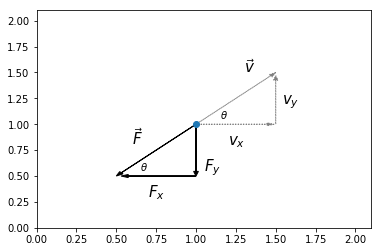

In [63]:
plt.arrow(1, 1, 0.5, 0.5, ls=':', color='grey', head_width=0.03, fc='grey', length_includes_head=True)
plt.text(1.3, 1.5, r'$\vec{v}$', fontsize=15)

plt.arrow(1, 1, 0.49, 0, ls=':', color='grey', head_width=0.03, fc='grey', length_includes_head=True)
plt.text(1.2, 0.8, r'$v_x$', fontsize=15)

plt.arrow(1.5, 1, 0, 0.47, ls=':', color='grey', head_width=0.03, fc='grey', length_includes_head=True)
plt.text(1.54, 1.2, r'$v_y$', fontsize=15)

plt.arrow(1, 1, -0.5, -0.5, head_width=0.03, fc='#000000', length_includes_head=True)
plt.text(0.6, 0.8, r'$\vec{F}$', fontsize=15)

plt.arrow(1, 0.5, -0.47, 0, head_width=0.03, fc='#000000', length_includes_head=True)
plt.text(0.7, 0.3, r'$F_x$', fontsize=15)

plt.arrow(1, 1, 0, -0.5, head_width=0.03, fc='#000000', length_includes_head=True)
plt.text(1.05, 0.55, r'$F_y$', fontsize=15)

plt.text(0.65, 0.55, r'$\theta$', fontsize=10)
plt.text(1.15, 1.05, r'$\theta$', fontsize=10)

plt.plot(1, 1, 'o')
plt.axis([0, 2.1, 0, 2.1])


# Einstellungen des Plots
#plt.axis('scaled')
plt.show()

Aus der Darstellung kann entnommen werden: $F_x=F*\mathrm{cos}(\theta)$

Was wiederum dargesellt werden kann als: $F_x=F*v_x/v$

Mit gleichem vorgehen erhält man: $F_y=F*\mathrm{sin}(\theta)=F*v_y/v$

Reibungskraft


Reibungskraft proportional zur Masse


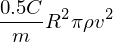

Reibungskraft in x Richtung


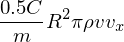

Verbunden mit x''=0-Reibungskraft in x Richtung


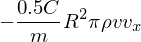

substituieren von v und v_x (mit x' und y')


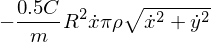

Reibungskraft in y Richtung


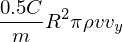

Verbunden mit y''=-g-Reibungskraft in y Richtung


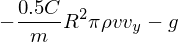

Substituieren von v und v_y (mit x' und y')


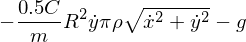

In [64]:
#B = 0.5*pi*R**2*rho*C
#B_prop = B/m
#display(B_prop)
#F_drag = -B*v**2
#F_drag_prop = -B_prop*v**2
print('Reibungskraft')
F = 0.5*pi*R**2*rho*C*v**2
display(F)
F_prop = F/m
print('Reibungskraft proportional zur Masse')
display(F_prop)
print('Reibungskraft in x Richtung')
F_drag_x = F_prop*v_x/v
display(F_drag_x)
str1 = 'Verbunden mit x\'\'=0-Reibungskraft in x Richtung'
print(str1)
ddx_Lsg = 0 - F_drag_x
display(ddx_Lsg)
print('substituieren von v und v_x (mit x\' und y\')')
ddx_Lsg = ddx_Lsg.subs(v, v_val)
#display(ddx_Lsg)
ddx_Lsg = ddx_Lsg.subs(v_x, dotx)
display(ddx_Lsg)
print('Reibungskraft in y Richtung')
F_drag_y = F_prop*v_y/v
display(F_drag_y)
print('Verbunden mit y\'\'=-g-Reibungskraft in y Richtung')
ddy_Lsg = -g - F_drag_y
display(ddy_Lsg)
print('Substituieren von v und v_y (mit x\' und y\')')
ddy_Lsg = ddy_Lsg.subs(v, v_val)
#display(ddy_Lsg)
ddy_Lsg = ddy_Lsg.subs(v_y, doty)
display(ddy_Lsg)


### ii.

Führen Sie die beiden Differentialgleichungen 2. Ordnung in ein System von 4 Differentialgleichungen 1. Ordnung über und visualisieren Sie die Wurftrajektorie.


In [65]:
ddy, ddx, dx = sy.symbols('ddy, ddx, \dot{x}', function=True)
x1, y1 = sy.symbols('x_1, y_1')

Um die Differentialgleichungen überzuführen werden die Differentialgleichungen $\dot{x}$ und $\dot{y}$ in den Differentialgleichungen als Variablen $x_1$ und $y_1$ angesehen.

In [66]:
print('1. Differentialgleichung 1. Ordnung')
eq_dy_1 = sy.Eq(dy(t), y1)
display(eq_dy_1)
print('2. Differentialgleichung 1. Ordnung')
eq_dx_1 = sy.Eq(dx(t), x1)
display(eq_dx_1)

1. Differentialgleichung 1. Ordnung


2. Differentialgleichung 1. Ordnung


y'' dargestellt durch d/dt y'


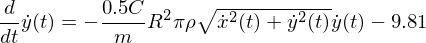

Substituieren von x' und y' mit den eben eingeführten Differentialgleichungen


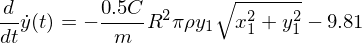

Allgemeine Lösung für y' aus dsolve


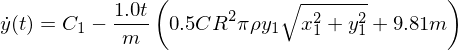

Anfangsbedingung für y' (= Anfangsbedingung für y'(0) = vy0)


Anfangsbedingung Eingesetzt in die Allgemeine Lösung


Daraus Lösung der Konstante


Konstante in Allgemeine Lösung eingesetzt.
Daraus ergibt sich die Lösung für diese Anfangsbedingung:


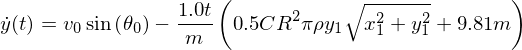

In [67]:
print('y\'\' dargestellt durch d/dt y\'')
eq_dy_1_s = sy.solve(eq_dy_1)
#display(eq_dy_1_s)
eq_dy = sy.Eq(sy.Derivative(dy(t), t, 1), (-(0.5*C)/m*R**2*rho*pi*dy(t)*sy.sqrt(dy(t)**2+dx(t)**2)-9.81))
display(eq_dy)
print('Substituieren von x\' und y\' mit den eben eingeführten Differentialgleichungen')
eq_dy_s = eq_dy.rhs.subs(dy(t), y1)
#display(eq_dy_s)
eq_dy = sy.Eq(sy.Derivative(dy(t), t, 1), eq_dy_s)
eq_dy_s = eq_dy.rhs.subs(dx(t), x1)
eq_dy = sy.Eq(sy.Derivative(dy(t), t, 1), eq_dy_s)
#display(eq_dy_s)
display(eq_dy)
print("Allgemeine Lösung für y\' aus dsolve")
display(sy.dsolve(eq_dy))
sol_dy = sy.dsolve(eq_dy)
print('Anfangsbedingung für y\' (= Anfangsbedingung für y\'(0) = vy0)')
ics = {dy(0): vy0}
display(ics)
print('Anfangsbedingung Eingesetzt in die Allgemeine Lösung')
C_dy_eq = sy.Eq(sol_dy.lhs.subs(t, 0).subs(ics), sol_dy.rhs.subs(t, 0))
display(C_dy_eq)
C_dy_sol = sy.solve(C_dy_eq)
print('Daraus Lösung der Konstante')
display(C_dy_sol)
print('Konstante in Allgemeine Lösung eingesetzt.')
print('Daraus ergibt sich die Lösung für diese Anfangsbedingung:')
dy_Lsg = sol_dy.subs(C_dy_sol[0])
display(dy_Lsg)

x'' dargestellt durch d/dt x'


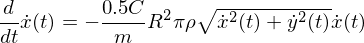

Substituieren von x' und y' mit den eben eingeführten Differentialgleichungen


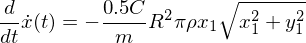

Allgemeine Lösung für x' aus dsolve


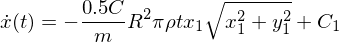

Anfangsbedingung für x' (= Anfangsbedingung für x'(0) = vx0)
Anfangsbedingung Eingesetzt in die Allgemeine Lösung


Daraus Lösung der Konstante


Konstante in Allgemeine Lösung eingesetzt.
Daraus ergibt sich die Lösung für diese Anfangsbedingung:


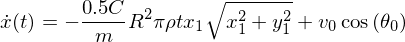

In [68]:
print('x\'\' dargestellt durch d/dt x\'')
eq_dx = sy.Eq(sy.Derivative(dx(t),t, 1), (-0.5*C)/m*R**2*rho*pi*dx(t)*sy.sqrt(dy(t)**2+dx(t)**2))
display(eq_dx)
print('Substituieren von x\' und y\' mit den eben eingeführten Differentialgleichungen')
eq_dx_s = eq_dx.rhs.subs(dx(t), x1)
eq_dx = sy.Eq(sy.Derivative(dx(t), t, 1), eq_dx_s)
eq_dx_s = eq_dx.rhs.subs(dy(t), y1)
eq_dx = sy.Eq(sy.Derivative(dx(t), t, 1), eq_dx_s)
display(eq_dx)
#display(eq_dx_s)
print("Allgemeine Lösung für x\' aus dsolve")
sol_dx = sy.dsolve(eq_dx)
display(sol_dx)
#sol_dy = sy.dsolve(eq_dy)
#sol_dy
#display(sol_dy)
print('Anfangsbedingung für x\' (= Anfangsbedingung für x\'(0) = vx0)')
ics = {dx(0): vx0}
print('Anfangsbedingung Eingesetzt in die Allgemeine Lösung')
C_dx_eq = sy.Eq(sol_dx.lhs.subs(t,0).subs(ics), sol_dy.rhs.subs(t,0))
display(C_dx_eq)
print('Daraus Lösung der Konstante')
C_dx_sol = sy.solve(C_dx_eq)
display(C_dx_sol)
print('Konstante in Allgemeine Lösung eingesetzt.')
print('Daraus ergibt sich die Lösung für diese Anfangsbedingung:')
dx_Lsg = sol_dx.subs(C_dx_sol[0])
display(dx_Lsg)

Um nun den Wurf mit Reibungskraft zu berechnen wird das Eulerverfahren verwendet.

Die Funktion `eq_with_val` wird in der Funktion `shot_with_air_resistance`, welche den Wurf mit Reibungskraft berechnet, aufgerufen um die übergebenen Parameter in die berechneten Gleichungen für $\ddot{x}, \ \ddot{y}, \ \dot{x}$ und $\dot{y}$ einzusetzen. 

In [111]:
def eq_with_val(konst_vals, v0_val, theta0_val):
    """
    :param konst_vals: Liste mit Werten der konstanten Parameter (R=Radius, m=Masse, rho=Dichte der Luft)
    :param v0_val: Anfangsgeschwindigkeit
    :param theta0_val: Abwurfwinkel
    :return: Funktionen ddy, dy, ddx und dx mit eingesetzten Werten
    """
    R_val = konst_vals[0]
    roh_val = konst_vals[1]
    m_val = konst_vals[2]
    dy_val = dy_Lsg.rhs.subs(R, R_val).subs(C, C_val).subs(pi, math.pi).subs(m, m_val).subs(rho, rho_val).subs(v0, v0_val).subs(theta0, theta0_val).subs(g, g_val)    
    ddy_val = ddy_Lsg.subs(R, R_val).subs(C, C_val).subs(pi, math.pi).subs(m, m_val).subs(rho, rho_val).subs(g, g_val)
    
    dx_val = dx_Lsg.rhs.subs(R, R_val).subs(C, C_val).subs(pi, math.pi).subs(m, m_val).subs(rho, rho_val).subs(v0, v0_val).subs(theta0, theta0_val)
    ddx_val = ddx_Lsg.subs(R, R_val).subs(C, C_val).subs(pi, math.pi).subs(m, m_val).subs(rho, rho_val)
    
    return ddy_val, dy_val, ddx_val, dx_val

Die Funktion `euler_air_resistance` wird von `shot_with_air_resistance` aufgerufen um, die Werte für den Wurf mit Reibungskraft zu berechnen.
Sie benutzt wie der Name vermuten lässt das Euler Verfahren, ähnlich wie bei der numerischen Berechnung eines schrägen Wurfs.

In [153]:
def euler_air_resistance(ns, lists, t_funk, h):
    """
    :param ns: Liste der zuletzt berechneten Werte für, ddy, ddx, dy, dx, y, x
    :param list: Liste der alten Werte für y, x
    :param list: ddy, ddx in Abhängigkeit von t
    :param h: Schrittweite fürs Euler Verfahren 
    :return: erg dictionary
    erg['old n']: alte Werte zum lezten Zeitpunkt t-h
    erg['value list']: liste mit allen bis berechneten Werten
    erg['old h']: Schrittweite
    """
    ddy_n = ns[0]
    ddx_n = ns[1]
    dy_n = ns[2]
    dx_n = ns[3]
    y_n = ns[4]
    x_n = ns[5]
    y_e_f = lists[0]
    x_e_f = lists[1]
    ddy_t = t_funk[0]
    ddx_t = t_funk[1]
    y_np1 = euler(y_n, h, dy_n)
    erg = {'old n': [ddy_n, ddx_n, dy_n, dx_n, y_n, x_n], 'value lists' : [y_e_f, x_e_f], 'old h': h}
    while y_np1>=y0_val:
        
        y_np1 = euler(y_n, h, dy_n)
        x_np1 = euler(x_n, h, dx_n)
        ddy_np1 = ddy_t.subs(dotx, dx_n).subs(doty, dy_n)
        ddx_np1 = ddx_t.subs(dotx, dx_n).subs(doty, dy_n)
        dy_np1 = euler(dy_n, h , ddy_np1)
        dx_np1 = euler(dx_n, h , ddx_np1)
        
        y_e_f.append(y_np1)
        x_e_f.append(x_np1)
        erg = {'old n': [ddy_n, ddx_n, dy_n, dx_n, y_n, x_n], 'value lists' : [y_e_f, x_e_f], 'old h': h}
        ddy_n = ddy_np1
        ddx_n = ddx_np1
        dy_n = dy_np1
        dx_n = dx_np1
        y_n = y_np1
        x_n = x_np1
    return erg

In [154]:
def shot_with_air_resistance(konst_vals, start_vals, h):
    """
    :param konst_vals: Liste mit Werten der konstanten Parameter (R=Radius, m=Masse, rho=Dichte der Luft)
    :param start_vals: Anfangswerte für x, y, v, theta
    :param h: Schrittweite
    """
    x0_val = start_vals[0]
    y0_val = start_vals[1]
    v0_val = start_vals[2]
    theta0_vals = start_vals[3]
    vx0 = v0_val*sy.cos(theta0_val)
    vy0 = v0_val*sy.sin(theta0_val)

    ddy_val, dy_val, ddx_val, dx_val = eq_with_val(konst_vals, v0_val, theta0_val)
    
    ddy_t = ddy_val
    dy_t = dy_val

    dy_n = vy0

    ddx_t = ddx_val
    dx_t = dx_val

    dx_n = vx0
    
    y_n = y0_val
    x_n = x0_val

    y_e_f = [y0_val]
    x_e_f = [x0_val]
    
    ns = [ddy_n, ddx_n, dy_n, dx_n, y_n, x_n]
    lists = [y_e_f, x_e_f]
    t_funk = [ddy_t, ddx_t]
    erg = euler_air_resistance(ns, lists, t_funk, h)
    
    erg_lists = erg['value lists']
    y_e_f = erg_lists[0]
    x_e_f = erg_lists[1]
    return x_e_f, y_e_f

Um die Funktion zu testen wird immer einer der Parameter konstant gehalten während die anderen verändert werden.
Der Anfangsort wird zum Testen jedoch nicht beachtet und immer konstant gehalten da der Einfluss dieses nicht wichtig zum Testen der Richtigkeit ist.

Als erstes wird der Wurf für verschiedene Werten für den Abwurfwinkel getestet. Es wird erwartet das für höhere Abwurfwinkel die Kurve steiler, für geringere Abwurfwinkel die Kurve flacher wird.

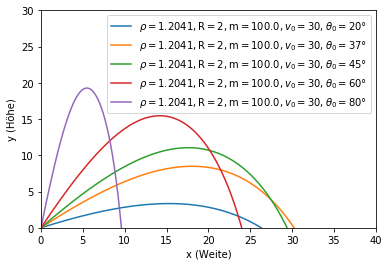

In [212]:
C_val = 0.5
h = 0.01
y0_val = 0
x0_val = 0

rho_val = 1.2041 #Dichte der Luft
R_val = 2 #Radius
m_val = 1e2
v0_val = 30

theta0_grad = 20
theta0_val = math.radians(theta0_grad)
konst_vals = [R_val, rho_val, m_val]
start_vals = [x0_val, y0_val, v0_val, theta0_val]
_label = r'$\rho='+str(rho_val)+r', \mathrm{R}='+str(R_val)+r', \mathrm{m}='+str(m_val)+r', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_e_f, y_e_f = shot_with_air_resistance(konst_vals, start_vals, h)
plt.plot(x_e_f, y_e_f, label=_label)

theta0_grad = 37
theta0_val = math.radians(theta0_grad)
konst_vals = [R_val, rho_val, m_val]
start_vals = [x0_val, y0_val, v0_val, theta0_val]
_label = r'$\rho='+str(rho_val)+r', \mathrm{R}='+str(R_val)+r', \mathrm{m}='+str(m_val)+r', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_e_f, y_e_f = shot_with_air_resistance(konst_vals, start_vals, h)
plt.plot(x_e_f, y_e_f, label=_label)

theta0_grad = 45
theta0_val = math.radians(theta0_grad)
konst_vals = [R_val, rho_val, m_val]
start_vals = [x0_val, y0_val, v0_val, theta0_val]
_label = r'$\rho='+str(rho_val)+r', \mathrm{R}='+str(R_val)+r', \mathrm{m}='+str(m_val)+r', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_e_f, y_e_f = shot_with_air_resistance(konst_vals, start_vals, h)
plt.plot(x_e_f, y_e_f, label=_label)

theta0_grad = 60
theta0_val = math.radians(theta0_grad)
konst_vals = [R_val, rho_val, m_val]
start_vals = [x0_val, y0_val, v0_val, theta0_val]
_label = r'$\rho='+str(rho_val)+r', \mathrm{R}='+str(R_val)+r', \mathrm{m}='+str(m_val)+r', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_e_f, y_e_f = shot_with_air_resistance(konst_vals, start_vals, h)
plt.plot(x_e_f, y_e_f, label=_label)

theta0_grad = 80
theta0_val = math.radians(theta0_grad)
konst_vals = [R_val, rho_val, m_val]
start_vals = [x0_val, y0_val, v0_val, theta0_val]
_label = r'$\rho='+str(rho_val)+r', \mathrm{R}='+str(R_val)+r', \mathrm{m}='+str(m_val)+r', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_e_f, y_e_f = shot_with_air_resistance(konst_vals, start_vals, h)
plt.plot(x_e_f, y_e_f, label=_label)

plt.legend()
plt.xlabel('x (Weite)')
plt.ylabel('y (Höhe)')
plt.axis([0, 40, 0, 30])
plt.show()

Die zuvor angenommene Auswirkung des Abwurfwinkels auf den Wurf wurde bestätigt, weshalb angenommen werden kann das die Funktion diese Parameter richtig behandelt.

Zudem fällt auf das bei einem Wurf mit Luftreibung der höchste Wert für die Wurfweite nicht mehr für 45° erreicht wird.

Für den nächsten Test wird nur der Wert für die Abwurfgeschwindigkeit verändert. 
Zunächst wird davon ausgegangen, dass das Objekt für eine höhere Abwurfgeschwindigkeit weiter fliegt. Zudem hat die Luftreibung bei einer höheren Geschwindikeit eine höhere Auswirkung entgegen dieser. Deshalb wird davon ausgegangen das der Wurf für eine höhere Abwurfgeschwindigkeit nach erreichen des Höhepunktes steiler abfällt.

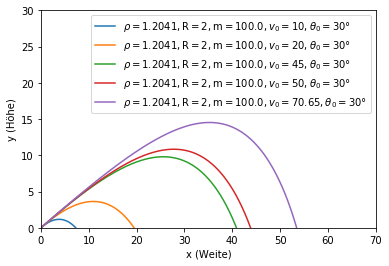

In [179]:
rho_val = 1.2041 #Dichte der Luft
R_val = 2 #Radius
m_val = 1e2
theta0_grad = 30
theta0_val = math.radians(theta0_grad)

v0_val = 10
konst_vals = [R_val, rho_val, m_val]
start_vals = [x0_val, y0_val, v0_val, theta0_val]
_label = r'$\rho='+str(rho_val)+r', \mathrm{R}='+str(R_val)+r', \mathrm{m}='+str(m_val)+r', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_e_f, y_e_f = shot_with_air_resistance(konst_vals, start_vals, h)
plt.plot(x_e_f, y_e_f, label=_label)

v0_val = 20
konst_vals = [R_val, rho_val, m_val]
start_vals = [x0_val, y0_val, v0_val, theta0_val]
_label = r'$\rho='+str(rho_val)+r', \mathrm{R}='+str(R_val)+r', \mathrm{m}='+str(m_val)+r', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_e_f, y_e_f = shot_with_air_resistance(konst_vals, start_vals, h)
plt.plot(x_e_f, y_e_f, label=_label)

v0_val = 45
konst_vals = [R_val, rho_val, m_val]
start_vals = [x0_val, y0_val, v0_val, theta0_val]
_label = r'$\rho='+str(rho_val)+r', \mathrm{R}='+str(R_val)+r', \mathrm{m}='+str(m_val)+r', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_e_f, y_e_f = shot_with_air_resistance(konst_vals, start_vals, h)
plt.plot(x_e_f, y_e_f, label=_label)

v0_val = 50
konst_vals = [R_val, rho_val, m_val]
start_vals = [x0_val, y0_val, v0_val, theta0_val]
_label = r'$\rho='+str(rho_val)+r', \mathrm{R}='+str(R_val)+r', \mathrm{m}='+str(m_val)+r', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_e_f, y_e_f = shot_with_air_resistance(konst_vals, start_vals, h)
plt.plot(x_e_f, y_e_f, label=_label)

v0_val = 70.65
konst_vals = [R_val, rho_val, m_val]
start_vals = [x0_val, y0_val, v0_val, theta0_val]
_label = r'$\rho='+str(rho_val)+r', \mathrm{R}='+str(R_val)+r', \mathrm{m}='+str(m_val)+r', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_e_f, y_e_f = shot_with_air_resistance(konst_vals, start_vals, h)
plt.plot(x_e_f, y_e_f, label=_label)

plt.legend()
plt.xlabel('x (Weite)')
plt.ylabel('y (Höhe)')
plt.axis([0, 70, 0, 30])
plt.show()

Auch für die Abwurfgeschwindikeit wurden die Annahmen bestätigt, die Funktion scheint auf diesen Parameter also auuch richtig zu reagieren.

Der nächste Parameter auf den die Funktion getestet werden soll ist die Masse des geworfenen Objekts.
Hier wird davon ausgegangen das für eine größere Masse eine höhere Wurfweite erreicht wird, da ein Objekt mit mehr Masse die Abwurfgeschwindikeit besser umsetzten kann.

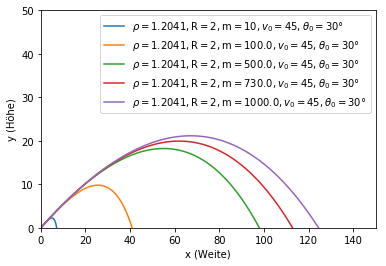

In [190]:
rho_val = 1.2041 #Dichte der Luft
R_val = 2 #Radius
theta0_grad = 30
theta0_val = math.radians(theta0_grad)
v0_val = 45

m_val = 10
konst_vals = [R_val, rho_val, m_val]
start_vals = [x0_val, y0_val, v0_val, theta0_val]
_label = r'$\rho='+str(rho_val)+r', \mathrm{R}='+str(R_val)+r', \mathrm{m}='+str(m_val)+r', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_e_f, y_e_f = shot_with_air_resistance(konst_vals, start_vals, h)
plt.plot(x_e_f, y_e_f, label=_label)

m_val = 1e2
konst_vals = [R_val, rho_val, m_val]
start_vals = [x0_val, y0_val, v0_val, theta0_val]
_label = r'$\rho='+str(rho_val)+r', \mathrm{R}='+str(R_val)+r', \mathrm{m}='+str(m_val)+r', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_e_f, y_e_f = shot_with_air_resistance(konst_vals, start_vals, h)
plt.plot(x_e_f, y_e_f, label=_label)

m_val = 5e2
konst_vals = [R_val, rho_val, m_val]
start_vals = [x0_val, y0_val, v0_val, theta0_val]
_label = r'$\rho='+str(rho_val)+r', \mathrm{R}='+str(R_val)+r', \mathrm{m}='+str(m_val)+r', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_e_f, y_e_f = shot_with_air_resistance(konst_vals, start_vals, h)
plt.plot(x_e_f, y_e_f, label=_label)

m_val = 7.3e2
konst_vals = [R_val, rho_val, m_val]
start_vals = [x0_val, y0_val, v0_val, theta0_val]
_label = r'$\rho='+str(rho_val)+r', \mathrm{R}='+str(R_val)+r', \mathrm{m}='+str(m_val)+r', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_e_f, y_e_f = shot_with_air_resistance(konst_vals, start_vals, h)
plt.plot(x_e_f, y_e_f, label=_label)

m_val = 1e3
konst_vals = [R_val, rho_val, m_val]
start_vals = [x0_val, y0_val, v0_val, theta0_val]
_label = r'$\rho='+str(rho_val)+r', \mathrm{R}='+str(R_val)+r', \mathrm{m}='+str(m_val)+r', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_e_f, y_e_f = shot_with_air_resistance(konst_vals, start_vals, h)
plt.plot(x_e_f, y_e_f, label=_label)

plt.legend()
plt.xlabel('x (Weite)')
plt.ylabel('y (Höhe)')
plt.axis([0, 150, 0, 50])
plt.show()

Hier wurden ebenfalls die Annahmen bestätigt. Somit wird davon ausgegangen dass die Behandlung der Masse von der Funktion keinen Fehler enthält.

Der nächste Test findet durch die Änderung der Werte für den Radius des Objekts statt.
Hierbei wird davon ausgegangen das größere Wurfweiten erzielt werden, je kleiner der Radius des Objekts ist. Denn je geringe der Radius, desto gringer die Angriffsfläche für die Luftreibung.

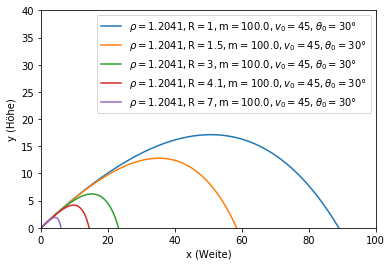

In [206]:
rho_val = 1.2041 #Dichte der Luft
R_val = 2
m_val = 1e2
theta0_grad = 30
theta0_val = math.radians(theta0_grad)
v0_val = 45

R_val = 1
konst_vals = [R_val, rho_val, m_val]
start_vals = [x0_val, y0_val, v0_val, theta0_val]
_label = r'$\rho='+str(rho_val)+r', \mathrm{R}='+str(R_val)+r', \mathrm{m}='+str(m_val)+r', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_e_f, y_e_f = shot_with_air_resistance(konst_vals, start_vals, h)
plt.plot(x_e_f, y_e_f, label=_label)

R_val = 1.5
konst_vals = [R_val, rho_val, m_val]
start_vals = [x0_val, y0_val, v0_val, theta0_val]
_label = r'$\rho='+str(rho_val)+r', \mathrm{R}='+str(R_val)+r', \mathrm{m}='+str(m_val)+r', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_e_f, y_e_f = shot_with_air_resistance(konst_vals, start_vals, h)
plt.plot(x_e_f, y_e_f, label=_label)

R_val = 3
konst_vals = [R_val, rho_val, m_val]
start_vals = [x0_val, y0_val, v0_val, theta0_val]
_label = r'$\rho='+str(rho_val)+r', \mathrm{R}='+str(R_val)+r', \mathrm{m}='+str(m_val)+r', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_e_f, y_e_f = shot_with_air_resistance(konst_vals, start_vals, h)
plt.plot(x_e_f, y_e_f, label=_label)

R_val = 4.1
konst_vals = [R_val, rho_val, m_val]
start_vals = [x0_val, y0_val, v0_val, theta0_val]
_label = r'$\rho='+str(rho_val)+r', \mathrm{R}='+str(R_val)+r', \mathrm{m}='+str(m_val)+r', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_e_f, y_e_f = shot_with_air_resistance(konst_vals, start_vals, h)
plt.plot(x_e_f, y_e_f, label=_label)

R_val = 7
konst_vals = [R_val, rho_val, m_val]
start_vals = [x0_val, y0_val, v0_val, theta0_val]
_label = r'$\rho='+str(rho_val)+r', \mathrm{R}='+str(R_val)+r', \mathrm{m}='+str(m_val)+r', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_e_f, y_e_f = shot_with_air_resistance(konst_vals, start_vals, h)
plt.plot(x_e_f, y_e_f, label=_label)

plt.legend()
plt.xlabel('x (Weite)')
plt.ylabel('y (Höhe)')
plt.axis([0, 100, 0, 40])
plt.show()

Auch für den Radius wurden die Annahmen bestätigt. Nun muss nurnoch der Parameter $\rho$, der Wert für die Dichte der Luft getestet werden.

Es wird angenommen, das für eine geringere Luftdichte das Objekt weiter fliegt, da für eine geringere Dichte weniger Luftwiderstand besteht.

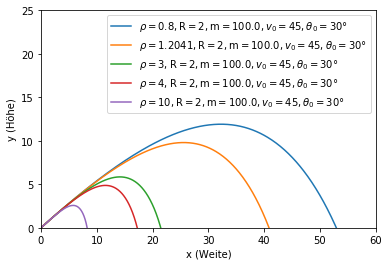

In [213]:
rho_val = 1.2041
R_val = 2
m_val = 1e2
theta0_grad = 30
theta0_val = math.radians(theta0_grad)
v0_val = 45

rho_val = 0.8
konst_vals = [R_val, rho_val, m_val]
start_vals = [x0_val, y0_val, v0_val, theta0_val]
_label = r'$\rho='+str(rho_val)+r', \mathrm{R}='+str(R_val)+r', \mathrm{m}='+str(m_val)+r', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_e_f, y_e_f = shot_with_air_resistance(konst_vals, start_vals, h)
plt.plot(x_e_f, y_e_f, label=_label)

rho_val = 1.2041
konst_vals = [R_val, rho_val, m_val]
start_vals = [x0_val, y0_val, v0_val, theta0_val]
_label = r'$\rho='+str(rho_val)+r', \mathrm{R}='+str(R_val)+r', \mathrm{m}='+str(m_val)+r', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_e_f, y_e_f = shot_with_air_resistance(konst_vals, start_vals, h)
plt.plot(x_e_f, y_e_f, label=_label)

rho_val = 3
konst_vals = [R_val, rho_val, m_val]
start_vals = [x0_val, y0_val, v0_val, theta0_val]
_label = r'$\rho='+str(rho_val)+r', \mathrm{R}='+str(R_val)+r', \mathrm{m}='+str(m_val)+r', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_e_f, y_e_f = shot_with_air_resistance(konst_vals, start_vals, h)
plt.plot(x_e_f, y_e_f, label=_label)

rho_val = 4
konst_vals = [R_val, rho_val, m_val]
start_vals = [x0_val, y0_val, v0_val, theta0_val]
_label = r'$\rho='+str(rho_val)+r', \mathrm{R}='+str(R_val)+r', \mathrm{m}='+str(m_val)+r', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_e_f, y_e_f = shot_with_air_resistance(konst_vals, start_vals, h)
plt.plot(x_e_f, y_e_f, label=_label)

rho_val = 10
konst_vals = [R_val, rho_val, m_val]
start_vals = [x0_val, y0_val, v0_val, theta0_val]
_label = r'$\rho='+str(rho_val)+r', \mathrm{R}='+str(R_val)+r', \mathrm{m}='+str(m_val)+r', v_0='+str(v0_val)+r', \theta_0 = '+str(theta0_grad)+'°$'
x_e_f, y_e_f = shot_with_air_resistance(konst_vals, start_vals, h)
plt.plot(x_e_f, y_e_f, label=_label)

plt.legend()
plt.xlabel('x (Weite)')
plt.ylabel('y (Höhe)')
plt.axis([0, 60, 0, 25])
plt.show()

Auch hier reagiert die Funktion auf die Änderung der Werte wie erwartet. Somit kann davon ausgegangen werden das die Funktion keine Fehler enthält und die richtigen Werte liefert.


### iii.

Untersuchen Sie die Wurfweite als Funktion der Masse und des Abwurfwinkels


Um die Wurfweite als Funktion der Masse und des Abwurfwinkels zu untersuchen wird das Euler Verfahren zur Berechnung des Wurfs mit Luftreibung verwendet.
Dieses wird zunächst für eine relativ hohe Schrittweite ($h=0.01$) durchgeführt. Da hier jedoch genauer vorgegangen werden soll um eine exakte Wurfweite berechnen zu können reicht nicht die einfache Berechnung durch ein numerisches Verfahren.

Um ein genaueres Ergebniss ereichen zu können wird deshalb das verfahren einmal ausgeführt und dann überprüft ob der letzte zurückgegebene $y$-Wert mit dem ersten $y$ Wert übereinstimmt (der Wurf beendet ist). Ist dies gegeben (mit einer gewissen Fehlertoleranz), wird das Verfahren beendet und die berechnete Wurfweite zurückgegeben. Falls dies nicht zutrifft wird das Euler Verfahren mit den vorletzten berechneten Wert (um ein über das Ziel 'hinausschießen' zu verhindern) mit der hälfte Schrittweite erneut ausgeführt, bis der Fehler geringer ist als die Toleranz.

In [214]:
TOL = 1e-15 

In [227]:
def x_max_f(masse, theta0_var):
    """
    :param masse: Masse des Objekts
    :param theta0_var: Abwurfwinkel
    :return: Wurfweite
    """
    
    dy_val = dy_Lsg.rhs
    dy_val = dy_val.subs(R, R_val).subs(C, C_val).subs(pi, math.pi).subs(m, masse).subs(rho, rho_val).subs(v0, v0_val).subs(theta0, theta0_var).subs(g, g_val)

    ddy_val = ddy_Lsg.subs(R, R_val).subs(C, C_val).subs(pi, math.pi).subs(m, masse).subs(rho, rho_val).subs(g, g_val)
    
    dx_val = dx_Lsg.rhs
    dx_val = dx_val.subs(R, R_val).subs(C, C_val).subs(pi, math.pi).subs(m, m_val).subs(rho, rho_val).subs(v0, v0_val).subs(theta0, theta0_var)

    ddx_val = ddx_Lsg.subs(R, R_val).subs(C, C_val).subs(pi, math.pi).subs(m, m_val).subs(rho, rho_val)
    h = 0.01
    y0_val = 0
    vx0 = v0_val*sy.cos(theta0_val)
    vy0 = v0_val*sy.sin(theta0_val)

    ddy_t = ddy_val
    dy_t = dy_val

    ddy_n = ddy_t.subs(dotx, vx0).subs(doty, vy0)
    dy_n = dy_t.subs(x1, vx0).subs(y1, vy0).subs(t, 0)
    
    ddx_t = ddx_val
    dx_t = dx_val
    
    ddx_n = ddx_t.subs(dotx, vx0).subs(doty, vy0)
    dx_n = dx_t.subs(x1, vx0).subs(y1, vy0).subs(t, 0)

    y_n = y0_val
    x_n = x0_val
    
    ns = [ddy_n, ddx_n, dy_n, dx_n, y_n, x_n]
    lists = [y_e_f, x_e_f]
    t_funk = [ddy_t, ddx_t]
    
    erg = euler_air_resistance(ns, lists, t_funk, h)
    maximum_x = erg['value lists'][1][-1]
    max_y = erg['value lists'][0][-1]
    
    while abs(max_y-y0_val) > TOL:
        ddy_n = erg['old n'][0]
        ddx_n = erg['old n'][1]
        dy_n = erg['old n'][2]
        dx_n = erg['old n'][3]
        y_n = erg['old n'][4]
        x_n = erg['old n'][5]
        h = (erg['old h']/2)

        ns = [ddy_n, ddx_n, dy_n, dx_n, y_n, x_n]
        lists = [y_e_f, x_e_f]
        t_funk = [ddy_t, ddx_t]
        erg = euler_air_resistance(ns, lists, t_funk, h)
        maximum_x = erg['value lists'][1][-1]
        max_y = erg['value lists'][0][-1]
    
    return maximum_x, max_y

In [224]:
rho_val = 1.2041 
R_val = 2 
m_val = 1e2
v0_val = 30

Die Funktion für die Wurfweite soll nun einmal durch verändern der Masse, bei konstantem Abwurfwinkel, und einmal durch verändern des Abwurfwinkels, bei konstanter Masse getestet werden.

Zunächst wird die Funktion durch verändern der Masse getestet, hierbei soll sich die Wurfweite, aufgrund der Erklärung die schon beim Testen der berechneten Wurffunktion genannt wurde, erhöhen wenn sich die Masse erhöht.

In [228]:
theta0_grad = 45
theta0_val = math.radians(theta0_grad)
masse = 1e5
print('Masse = ', masse, ', theta0 = ', theta0_grad,'°')
maximal, letztes_y = x_max_f(masse, theta0_val)
print('maximal x: ', maximal)
masse = 200
print('Masse = ', masse, ', theta0 = ', theta0_grad,'°')
maximal, letztes_y = x_max_f(masse, theta0_val)
print('maximal x: ', maximal)
masse = 100
print('Masse = ', masse, ', theta0 = ', theta0_grad,'°')
maximal, letztes_y = x_max_f(masse, theta0_val)
print('maximal x: ', maximal)
masse = 10
print('Masse = ', masse, ', theta0 = ', theta0_grad,'°')
maximal, letztes_y = x_max_f(masse, theta0_val)
print('maximal x: ', maximal)
masse = 5
print('Masse = ', masse, ', theta0 = ', theta0_grad,'°')
maximal, letztes_y = x_max_f(masse, theta0_val)
print('maximal x: ', maximal)

Masse =  100000.0 , theta0 =  45 °
maximal x:  31.9420970750406
Masse =  200 , theta0 =  45 °
maximal x:  30.8612532428438
Masse =  100 , theta0 =  45 °
maximal x:  29.4082971480833
Masse =  10 , theta0 =  45 °
maximal x:  20.7914189643627
Masse =  5 , theta0 =  45 °
maximal x:  19.4287816604513


Die Annahme, bezogen auf den Wert der Masse wurde bestätigt, nun muss die Funktion noch für verschiedene Winkel getestet werden.

Für einen Winkel unter 37° verringert sich die Wurfweite für einen geringeren Winklel, aus dem selben Grund die Wurfweite beim schrägen Wurf für unter 45° genannt wurde. Auch bei der Veringerung der Wurfweite bei Vergrößerung des Wurfwinkels bei über 37°, gilt die selbe Begründung wie beim schrägen Wurf. 

Der einzige Unterschied liegt also die Grenze die sich von 45° auf 37° verschiebt, da es beim Wurf mit Luftreibung nicht nur um die Gleichverteilung der Anfangsgeschwindikeit ankommt. Hier der geringe Winkel wirksamer, da das Objekt hier Flach unter dem 'Wind' geworfen wird.

Die oben beschriebenen Zusammenhänge von Grad des Abwurfwinkels und der Wurfweite sollen nun im Test beobachtet werde.

In [230]:
masse = 100
theta0_grad = 10
theta0_val = math.radians(theta0_grad)
print('Masse = ', masse, ', theta0 = ', theta0_grad,'°')
maximal, letztes_y = x_max_f(masse, theta0_val)
print('maximal x: ', maximal)
theta0_grad = 36
theta0_val = math.radians(theta0_grad)
print('Masse = ', masse, ', theta0 = ', theta0_grad,'°')
maximal, letztes_y = x_max_f(masse, theta0_val)
print('maximal x: ', maximal)
theta0_grad = 37
theta0_val = math.radians(theta0_grad)
print('Masse = ', masse, ', theta0 = ', theta0_grad,'°')
maximal, letztes_y = x_max_f(masse, theta0_val)
print('maximal x: ', maximal)
theta0_grad = 38
theta0_val = math.radians(theta0_grad)
print('Masse = ', masse, ', theta0 = ', theta0_grad,'°')
maximal, letztes_y = x_max_f(masse, theta0_val)
print('maximal x: ', maximal)
theta0_grad = 45
theta0_val = math.radians(theta0_grad)
print('Masse = ', masse, ', theta0 = ', theta0_grad,'°')
maximal, letztes_y = x_max_f(masse, theta0_val)
print('maximal x: ', maximal)
theta0_grad = 60
theta0_val = math.radians(theta0_grad)
print('Masse = ', masse, ', theta0 = ', theta0_grad,'°')
maximal, letztes_y = x_max_f(masse, theta0_val)
print('maximal x: ', maximal)
theta0_grad = 80
theta0_val = math.radians(theta0_grad)
print('Masse = ', masse, ', theta0 = ', theta0_grad,'°')
maximal, letztes_y = x_max_f(masse, theta0_val)
print('maximal x: ', maximal)

Masse =  100 , theta0 =  10 °
maximal x:  18.6277650803782
Masse =  100 , theta0 =  36 °
maximal x:  30.2409784897682
Masse =  100 , theta0 =  37 °
maximal x:  30.2449240795726
Masse =  100 , theta0 =  38 °
maximal x:  30.2240106635528
Masse =  100 , theta0 =  45 °
maximal x:  29.4082971480833
Masse =  100 , theta0 =  60 °
maximal x:  23.9856159672309
Masse =  100 , theta0 =  80 °
maximal x:  9.61119867444838
